In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Timestamp
from tqdm import tqdm
import math


# Reading the data

In [48]:
# data_df = pd.read_csv('crspm_and_predictors.csv')
data_df = pd.read_csv('crspm_and_predictors.csv')

data_df

,permno,yyyymm,prc,ret,Price,Size,STreversal,MaxRet,High52,RealizedVol,...,MomSeason06YrPlus,MomOffSeason06YrPlus,grcapx,EntMult,Investment,PctTotAcc,EarnSupBig,EarningsSurprise,BetaTailRisk,CBOperProf
0,10659,199102,-0.17188,-15.3846,1.760959,-8.844859,15.3846,0.000000,0.407414,-0.035295,...,NaN,NaN,0.799007,NaN,NaN,0.795044,-0.379424,-0.109776,NaN,-0.371791
1,10659,199103,-0.10938,-36.3636,2.212927,-8.392890,36.3636,0.000000,0.259268,-0.065733,...,NaN,NaN,0.799007,NaN,NaN,0.795044,-0.483346,-0.109776,NaN,-0.371791
2,10659,199104,-0.21875,100.0000,1.519826,-9.085992,-100.0000,-0.571429,0.518512,-0.127870,...,NaN,NaN,0.802281,NaN,-0.043613,0.439730,-0.470160,-0.050594,NaN,-0.138481
3,10659,199105,-0.21875,0.0000,1.519826,-9.085992,0.0000,-0.142857,0.518512,-0.045962,...,NaN,NaN,0.802281,NaN,-0.046697,0.439730,-0.498256,-0.050594,NaN,-0.138481
4,10659,199106,-0.20313,-7.1429,1.593909,-9.011908,7.1429,0.000000,0.481488,-0.015972,...,NaN,NaN,0.802281,NaN,-0.050251,0.439730,-0.116901,-0.050594,NaN,-0.138481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994023,10232,198604,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4994024,10274,198604,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4994025,10301,198604,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4994026,10326,198605,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
rf_rates = pd.read_csv('TB3MS.csv')
rf_rates

,observation_date,TB3MS
0,1934-01-01,0.72
1,1934-02-01,0.62
2,1934-03-01,0.24
3,1934-04-01,0.15
4,1934-05-01,0.16
...,...,...
1089,2024-10-01,4.51
1090,2024-11-01,4.42
1091,2024-12-01,4.27
1092,2025-01-01,4.21


In [50]:
rf_rates['observation_date'] = pd.to_datetime(rf_rates['observation_date'], format='%Y-%m-%d')
data_df['yyyymm'] = pd.to_datetime(data_df['yyyymm'], format='%Y%m')

# Exploratory Data Analysis
### Missing Values and Summary Stats
### Distribution Plots of Key Precitors
### Correlation HeatMap plot
### Outlier Analysis and BoxPlots

## 1. Missing Values & Summary Stats Plot Code


BetaTailRisk            2974537
MomOffSeason06YrPlus    2850545
MomSeason06YrPlus       2843051
ShareIss5Y              2776261
CBOperProf              2744488
EarningsSurprise        2713356
EarnSupBig              2690731
Investment              2671574
PctTotAcc               2667131
EntMult                 2652319
grcapx                  2639955
IndRetBig               2639494
ChAssetTurnover         2580384
roaq                    2550904
GrSaleToGrInv           2546504
HerfAsset               2523903
HerfBE                  2523903
VarCF                   2523149
AbnormalAccruals        2492152
CredRatDG               2485667
dtype: int64


/var/folders/7j/8pz9dqx16j514s66gfbnpf1r0000gn/T/ipykernel_37735/1733482714.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")


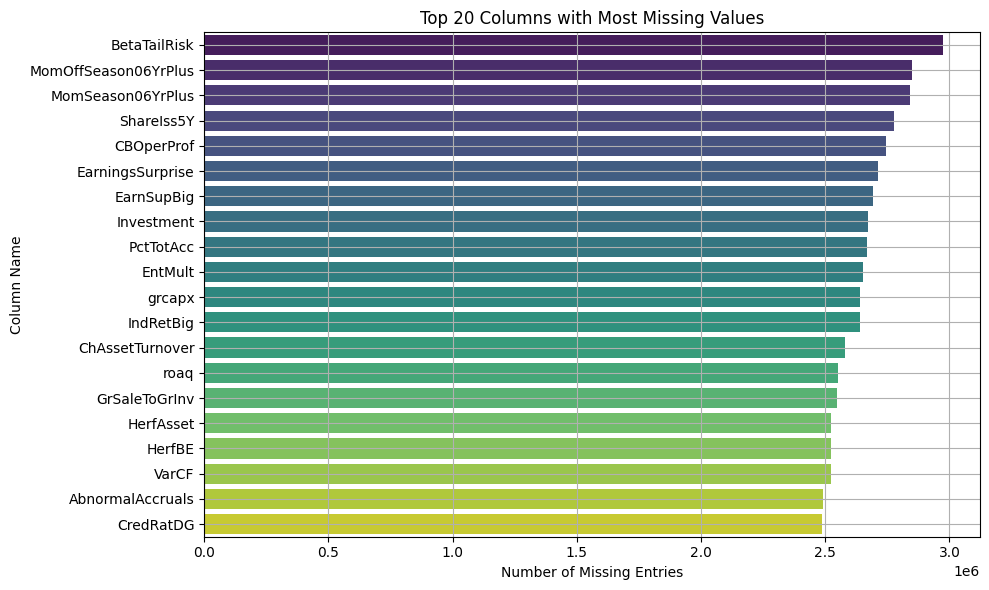

In [6]:

# --- Missing Values Bar Plot (Top 20 Columns) ---
missing_values = data_df.isnull().sum().sort_values(ascending=False).head(20)
print(missing_values)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")
plt.title('Top 20 Columns with Most Missing Values')
plt.xlabel('Number of Missing Entries')
plt.ylabel('Column Name')
plt.grid(True)
plt.tight_layout()
plt.show()



## Top 20 Columns with Most Missing Values

This bar chart displays the top 20 predictors with the highest number of missing entries.

---

### Key Observations:

- **`BetaTailRisk`**, **`MomOffSeason06YrPlus`**, and **`MomSeason06YrPlus`** have the most missing values (close to 3 million).
- Other predictors with substantial missingness include:
  - `CBOperProf`, `EarningsSurprise`, `EarnSupBig`, `PctTotAcc`
  - Intangible-related variables like `HerfAsset`, `HerfBE`, and `VarCF`
- These features may require:
  - Imputation (mean/median, regression, or advanced techniques)
  - Removal (if too sparse or low relevance)
  - Careful consideration in model training

---

### Next Steps:
- Consider **domain knowledge** when deciding whether to retain/impute.
- Use this insight to guide **feature selection and cleaning strategy**.

---


## 2. Time Series Plots/Trends
- Number of Firms overtime
- Average Monthly return over time


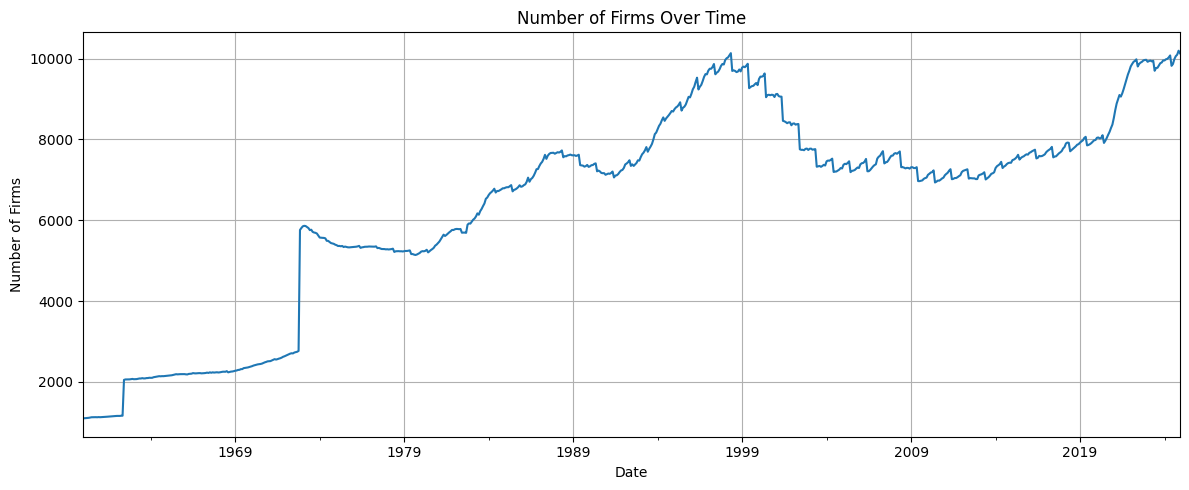

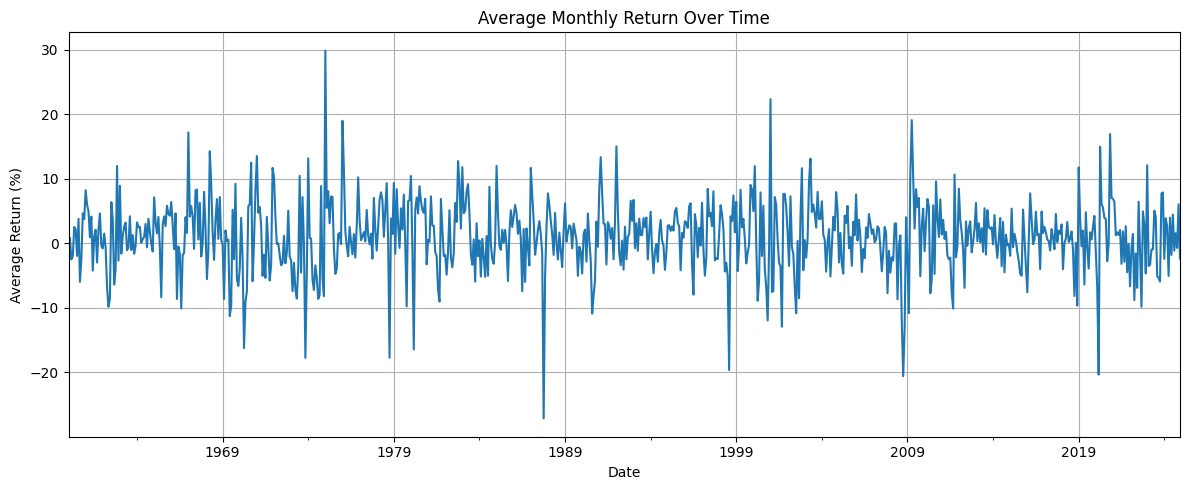

In [7]:
# Monthly firm counts and average return
monthly_firm_counts = data_df.groupby('yyyymm')['permno'].nunique()
monthly_avg_return = data_df.groupby('yyyymm')['ret'].mean()

# Plot firm count over time
plt.figure(figsize=(12, 5))
monthly_firm_counts.plot()
plt.title("Number of Firms Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Firms")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot average return over time
plt.figure(figsize=(12, 5))
monthly_avg_return.plot()
plt.title("Average Monthly Return Over Time")
plt.xlabel("Date")
plt.ylabel("Average Return (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Time-Series Summary

### Number of Firms Over Time
- Steady growth from 1960s to late 1990s, followed by a decline.
- Recent years show recovery to over 10,000 firms.

### Average Monthly Return Over Time
- Returns fluctuate heavily, with visible spikes and drops.
- No clear long-term trend, but periods of high volatility are evident.

---


## 3. Distribution Plots of key Predictors
- Size
- BM
- Mom12m
- ret

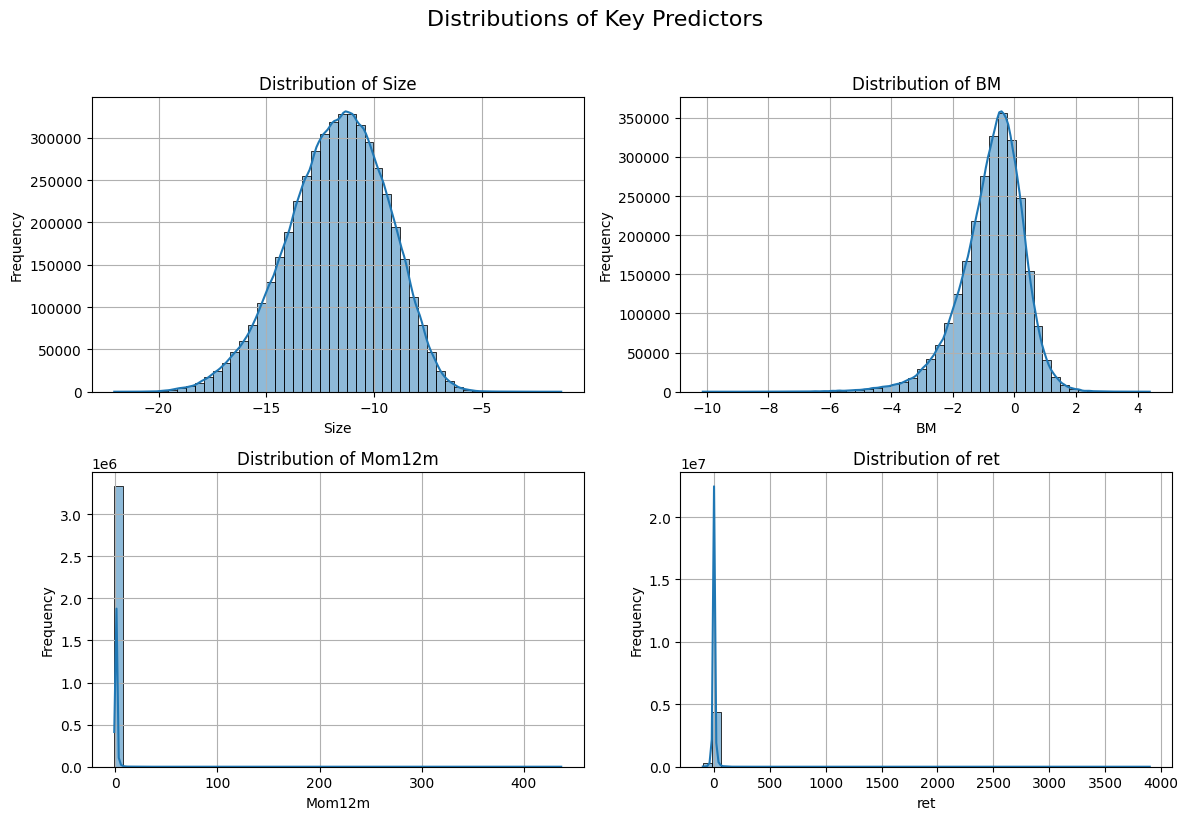

In [8]:

# Define key predictors
key_predictors = ['Size', 'BM', 'Mom12m', 'ret']
available_predictors = [var for var in key_predictors if var in data_df.columns]

# Set up subplot grid: 2 plots per row
n = len(available_predictors)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Generate histograms
for i, var in enumerate(available_predictors):
    sns.histplot(data_df[var].dropna(), bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distributions of Key Predictors", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Distributions of Key Predictors

This section summarizes the distributional characteristics of four key financial predictors based on histogram plots.

---

### **1. Size**
- Roughly **normally distributed** and symmetric.
- Likely already **log-transformed**.
- No extreme outliers visible.

---

### **2. BM (Book-to-Market)**
- Slight **right skew** with a long positive tail.
- Distribution centered around 0.
- Generally well-behaved.

---

### **3. Mom12m (12-month Momentum)**
- **Highly right-skewed** with extreme values.
- Most observations are concentrated near 0.
- Strong candidate for **winsorization** or **log transformation**.

---

### **4. ret (Returns)**
- Also shows a **sharp right skew**.
- Heavy concentration near 0 with extreme outliers (some > 3000).
- Consider **transformation** or **outlier filtering** before modeling.


## 4. Correlation Heatmap

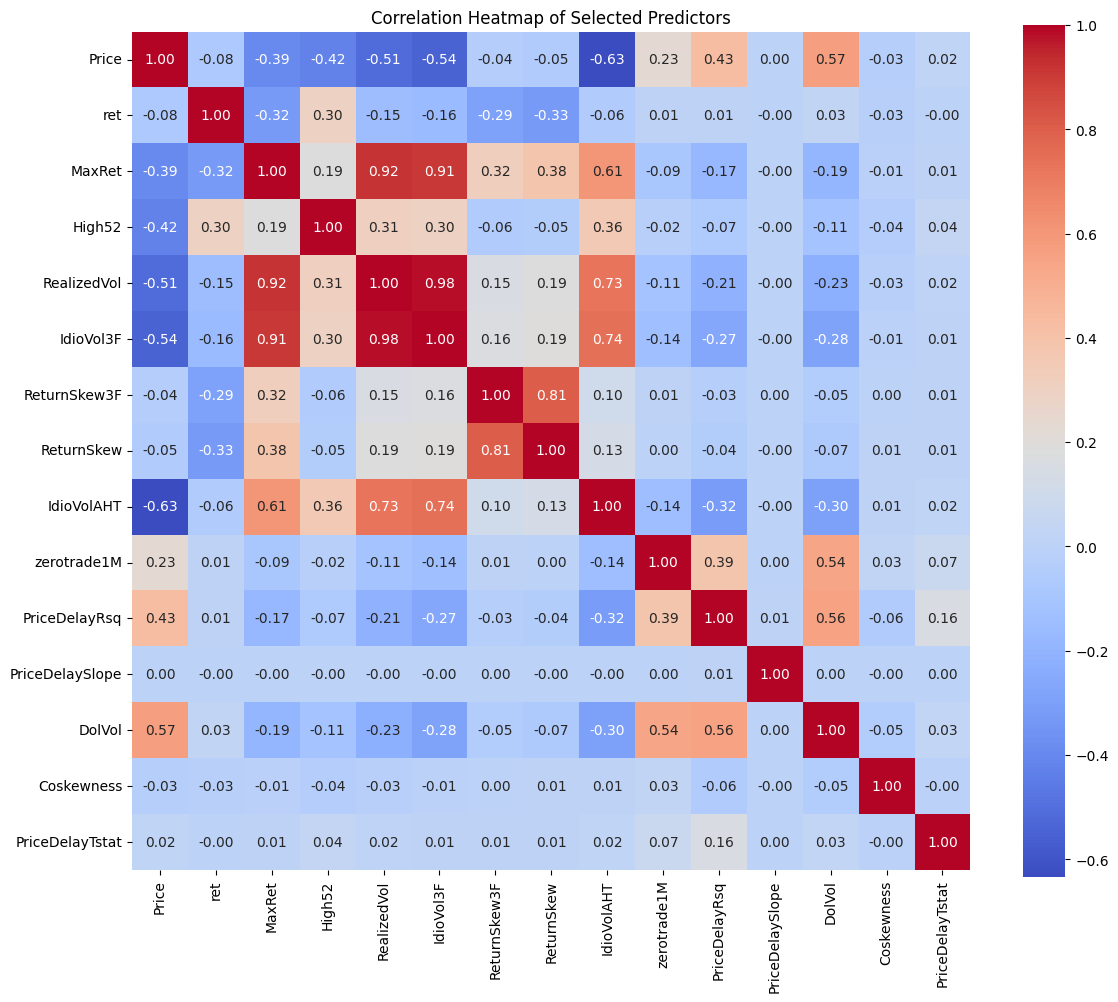

In [9]:
# Correlation heatmap for top predictors
non_null_counts = data_df.isnull().sum().sort_values()
top_predictors = non_null_counts[non_null_counts < len(data_df) * 0.2].index.tolist()[5:20]
corr_data = data_df[top_predictors].dropna().corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_data, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Selected Predictors")
plt.tight_layout()
plt.show()

## Correlation Heatmap Interpretation: Selected Financial Predictors

This heatmap visualizes the **pairwise Pearson correlation coefficients** between selected predictors. The colors represent strength and direction of the correlation:

- **Red**: Strong positive correlation
- **Blue**: Strong negative correlation
- **White**: Weak or no correlation

---

### Strong Positive Correlations

- **`RealizedVol`, `IdioVol3F`, `IdioVolAHT`, `MaxRet`**
  - All have very high mutual correlations (**> 0.9**)
  - These are volatility-related and likely redundant
- **`ReturnSkew` & `ReturnSkew3F`** = **0.81**
  - Near-duplicate skewness measures

---

### Redundant Variable Pairs (Corr ≥ 0.9)

| Variable Pair                    | Correlation | Suggestion            |
|----------------------------------|-------------|------------------------|
| `IdioVol3F` & `RealizedVol`      | 0.98        | Keep one              |
| `IdioVol3F` & `MaxRet`           | 0.92        | Likely redundant       |
| `ReturnSkew` & `ReturnSkew3F`    | 0.81        | Choose one             |
| `IdioVol3F` & `IdioVolAHT`       | 0.74        | Possibly redundant     |

These pairs measure similar risk/return asymmetries. Keep **only one** from each group in your model to avoid multicollinearity.

---

### Strong Negative Correlations

- **`Price` vs `IdioVolAHT`** = **-0.63**
- **`Price` vs `RealizedVol`, `IdioVol3F`** = around **-0.5**

Higher-priced stocks tend to have **lower idiosyncratic risk** and volatility.

---

### Low/Neutral Correlations

- **`ret`** shows weak correlation with all variables (mostly between -0.3 and 0.3)
  - Reflects the **difficulty in predicting returns linearly**
- **`Coskewness`** has very low correlations across the board
  - Could be an **informative independent signal**

---

### Recommendations

- Use **PCA or VIF analysis** to formally assess multicollinearity
- For modeling, retain:
  - **One volatility metric**: `IdioVol3F` OR `RealizedVol`
  - **One skewness metric**: `ReturnSkew` OR `ReturnSkew3F`
- Consider keeping:
  - `Coskewness` and `PriceDelayTstat` — low correlation = unique signal

---

### Summary

| Variable         | High Correlation With | Keep or Drop |
|------------------|------------------------|---------------|
| `RealizedVol`    | `IdioVol3F`, `MaxRet`  | Drop          |
| `ReturnSkew3F`   | `ReturnSkew`           | Drop          |
| `Coskewness`     | None                   | Keep          |
| `ret`            | Weakly correlated      | Target only   |


## 5. Outlier Analysis
- find top outliers using zscores approach
- we run boxplots on some outliers identified from the first step


In [ ]:

from scipy.stats import zscore

# Get summary stats of numeric columns
cleaned_data_df = data_df.replace({-np.inf: np.nan, np.inf: np.nan}).fillna(0)
summary = cleaned_data_df.select_dtypes(include=[np.number]).describe().T

# Calculate extra fields for outlier detection
summary["range"] = summary["max"] - summary["min"]
summary["mean_median_diff"] = np.abs(summary["mean"] - summary["50%"])
summary["std_relative"] = summary["std"] / (summary["mean"].replace(0, np.nan).abs())  # Avoid divide by 0

# Heuristics: large range, large mean-median difference, or very high std relative to mean
outlier_flags = (summary["range"] > 1000) | \
                (summary["mean_median_diff"] > summary["std"]) | \
                (summary["std_relative"] > 10)

# Filter for columns with potential issues
potential_outlier_vars = summary[outlier_flags].sort_values(by="range", ascending=False)

# Display
# Step 1: Select numeric columns
numeric_df = cleaned_data_df.select_dtypes(include=[np.number])

# Step 2: Drop rows with missing values for clean z-score calculation
zscore_df = numeric_df.dropna()

# Step 3: Calculate z-scores
zscores = zscore(zscore_df)

# Step 4: Create a mask for outliers (z-score > 3)
outlier_mask = np.abs(zscores) > 3

# Step 5: Count outliers per column
outlier_counts = outlier_mask.sum(axis=0)

# Step 6: Create summary DataFrame
outlier_summary = pd.DataFrame({
    'Variable': zscore_df.columns,
    'OutlierCount': outlier_counts,
    'TotalCount': len(zscore_df),
    'OutlierPercent': (outlier_counts / len(zscore_df)) * 100
}).sort_values(by='OutlierCount', ascending=False).reset_index(drop=True)

# Display the summary
print(outlier_summary.head(20))  # Top 20 variables with most outliers


## Box Plots for Outlier Analysis


chunk is ['ret', 'EarnSupBig']


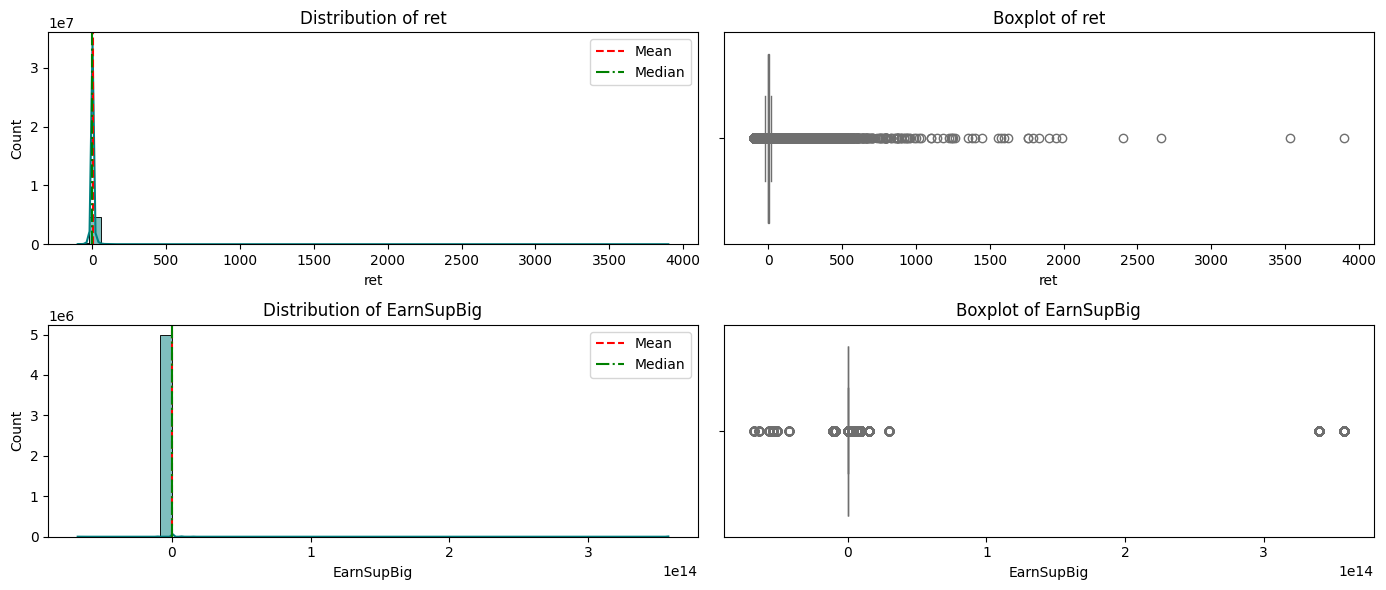

chunk is ['EarningsSurprise', 'Price']


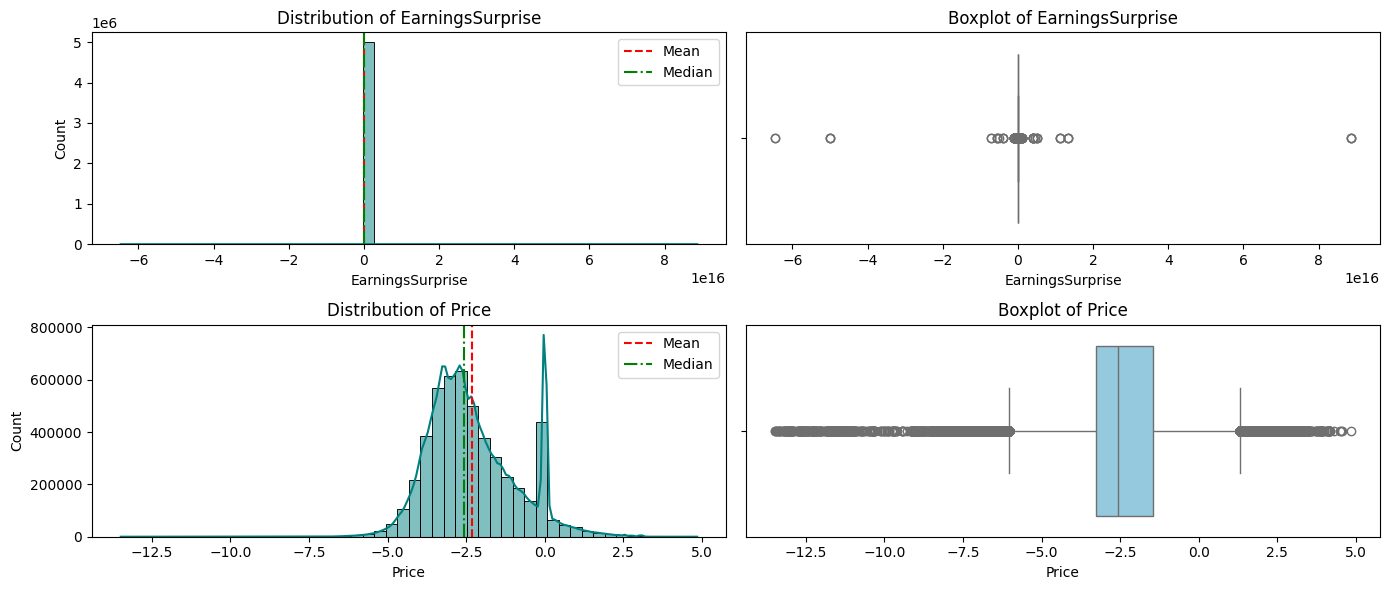

chunk is ['PctTotAcc', 'CBOperProf']


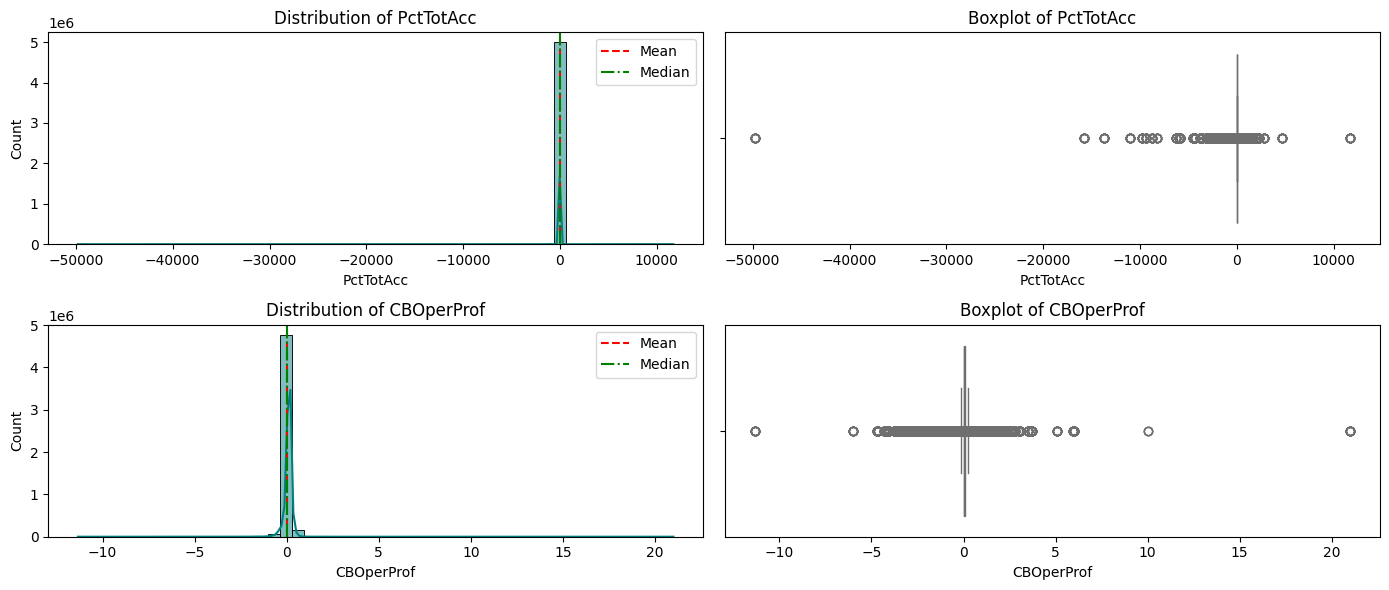

In [ ]:
# List of key variables with suspected outliers
OUTLIER_COLS = ['ret', 'EarnSupBig', 'EarningsSurprise', 'Price', 'PctTotAcc', 'CBOperProf']

def chunked(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
[i for i in chunked(OUTLIER_COLS, 4)]


outliers_data = cleaned_data_df[OUTLIER_COLS].replace([np.inf, -np.inf], np.nan).dropna()
# Helper: split list into chunks of 4
def chunked(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

for chunk in chunked(OUTLIER_COLS, 2):
    print(f'chunk is {chunk}' )
    fig, axes = plt.subplots(nrows=len(chunk), ncols=2,
                         figsize=(14, 3*len(chunk)))

    for i, col in enumerate(chunk):

        # Histogram with KDE
        #sns.histplot(clean_data[col], kde=True, ax=axes[i,0], color='teal')
        sns.histplot(outliers_data[col].dropna(), bins=50, kde=True, ax=axes[i, 0], color='teal')
        axes[i,0].axvline(outliers_data[col].mean(), color='red', linestyle='--', label='Mean')
        axes[i,0].axvline(outliers_data[col].median(), color='green', linestyle='-.', label='Median')
        axes[i,0].set_title(f'Distribution of {col}', fontsize=12)
        axes[i,0].legend()

        # Boxplot
        sns.boxplot(x=outliers_data[col], ax=axes[i,1], color='skyblue')
        axes[i,1].set_title(f'Boxplot of {col}', fontsize=12)

    plt.tight_layout()
    plt.show()

## Variable Distribution & Outlier Summary

Below is the interpretation of histogram + boxplot visualizations for selected financial predictors.

---

### **1. `ret` (Return)**
- **Skew**: Strong right-skewed
- **Outliers**: Extremely high returns (> 3000)
- **Insights**:
  - Most returns cluster near 0
  - Outliers heavily distort the distribution
- **Action**: Consider log-transform, winsorization, or trimming extreme values

---

### **2. `EarnSupBig` (Earnings Surprise - Big)**
- **Skew**: Highly right-skewed
- **Outliers**: Very large (up to ~1e14), both positive and negative
- **Insights**:
  - Extreme concentration at 0
  - May contain data quality issues
- **Action**: Log-transform (if strictly positive), clip/winsorize, or investigate abnormal values

---

### **3. `EarningsSurprise`**
- **Skew**: Extremely right-skewed
- **Outliers**: Huge magnitude (±1e16)
- **Insights**:
  - Likely overwhelming influence on models
  - Potential errors or unit mismatches
- **Action**: Investigate, then scale, transform, or clean

---

### **4. `Price`**
- **Skew**: Mild left-skew
- **Outliers**: Present but moderate
- **Insights**:
  - Distribution centered around -2
  - Shape resembles a log-normal or transformed scale
- **Action**: Log-scale check, winsorization optional, standardize for modeling

---

### **5. `PctTotAcc` (Percent Total Accruals)**
- **Skew**: Heavy left-skew
- **Outliers**: Extreme (from -50,000 to +10,000)
- **Insights**:
  - Most values near 0
  - Outliers dominate visualization and statistics
- **Action**: Winsorization strongly recommended

---

### **6. `CBOperProf` (Cash-Based Operating Profitability)**
- **Skew**: Mild skew
- **Outliers**: Present but not excessive
- **Insights**:
  - Tight distribution with few outlying values
- **Action**: Consider robust scaling (e.g. `RobustScaler`) or light winsorization

---

### Summary Table

| Variable         | Skewed? | Outliers? | Recommended Action                      |
|------------------|---------|-----------|------------------------------------------|
| `ret`            | Yes     | Extreme   | Winsorize or log-transform               |
| `EarnSupBig`     | Yes     | Extreme   | Investigate, clip, transform             |
| `EarningsSurprise` | Yes   | Very high | Clean or scale after inspection          |
| `Price`          | Slight  | Moderate  | Log-scale or winsorize if needed         |
| `PctTotAcc`      | Yes     | Severe    | Strong winsorization                     |
| `CBOperProf`     | Mild    | Moderate  | Robust scaling or light winsorization    |


## Principal Component Analysis (PCA) Analysis on the entire dataset


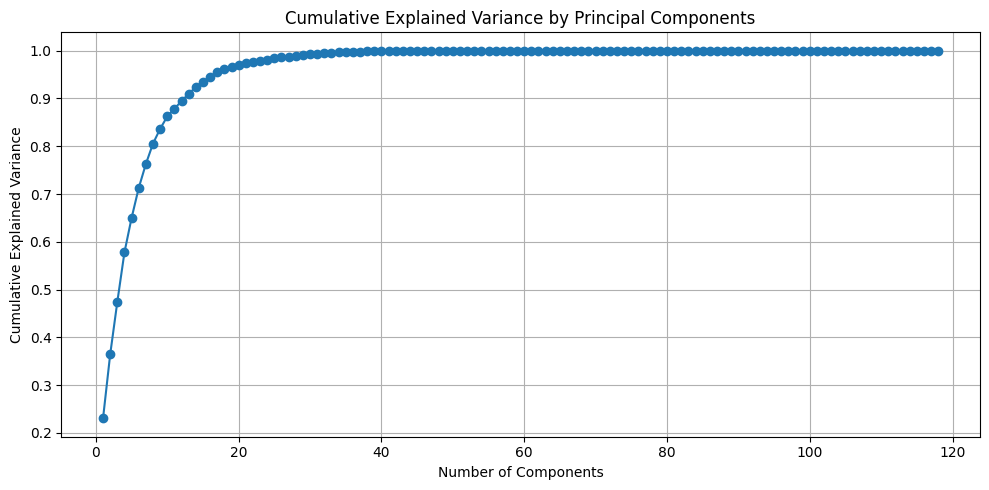

In [ ]:


# Step 1: Select numeric predictor variables only (exclude identifiers, returns, etc.)
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


predictor_df = cleaned_data_df.select_dtypes(include='number').fillna(0)

# Step 2: Drop columns with excessive missing values (>30%) and fill remaining
threshold = 0.3
missing_fraction = predictor_df.isnull().mean()
predictors_cleaned = predictor_df.loc[:, missing_fraction < threshold]
predictors_cleaned = predictors_cleaned.fillna(predictors_cleaned.mean())

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(predictors_cleaned)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()




## PCA Plot Interpretation

This plot is a classic **PCA  plot** showing the **cumulative explained variance** vs. the **number of principal components**.

---

### What the Plot Shows:

- **X-axis**: Number of principal components (PCs) — each one is a linear combination of original features.
- **Y-axis**: **Cumulative explained variance** — how much of the total variance in the data is explained as you add more components.

---

### Key Observations:

1. **Steep Rise in the First Few Components:**
   - The first ~10–15 components explain a **large portion** of the total variance (over 90%).
   - This suggests a lot of **redundancy or correlation** in your original features — PCA is effectively compressing the information.

2. **Plateau Around 20 Components:**
   - After about 20 components, the curve **flattens** — meaning additional components add **very little** new information.
   - Beyond this point, you're mostly capturing noise or very minor variation.

3. **~98% of Variance Explained by ~25–30 Components:**
   - From visual inspection, around 25–30 PCs explain nearly **100% of the variance**.
   - You started with ~119 features, so you can **reduce dimensionality by ~75%** with minimal information loss.

---

### Implications:

- PCA can significantly reduce the number of variables you use without losing much explanatory power.
- You might choose the **first 15–30 components** depending on your threshold (e.g., 95% or 99% variance).
- Useful for:
  - **Visualization**
  - **Reducing multicollinearity**
  - **Faster modeling with less noise**


## Feature Scaling Comparision MinMaxScaler vs StandardScaler

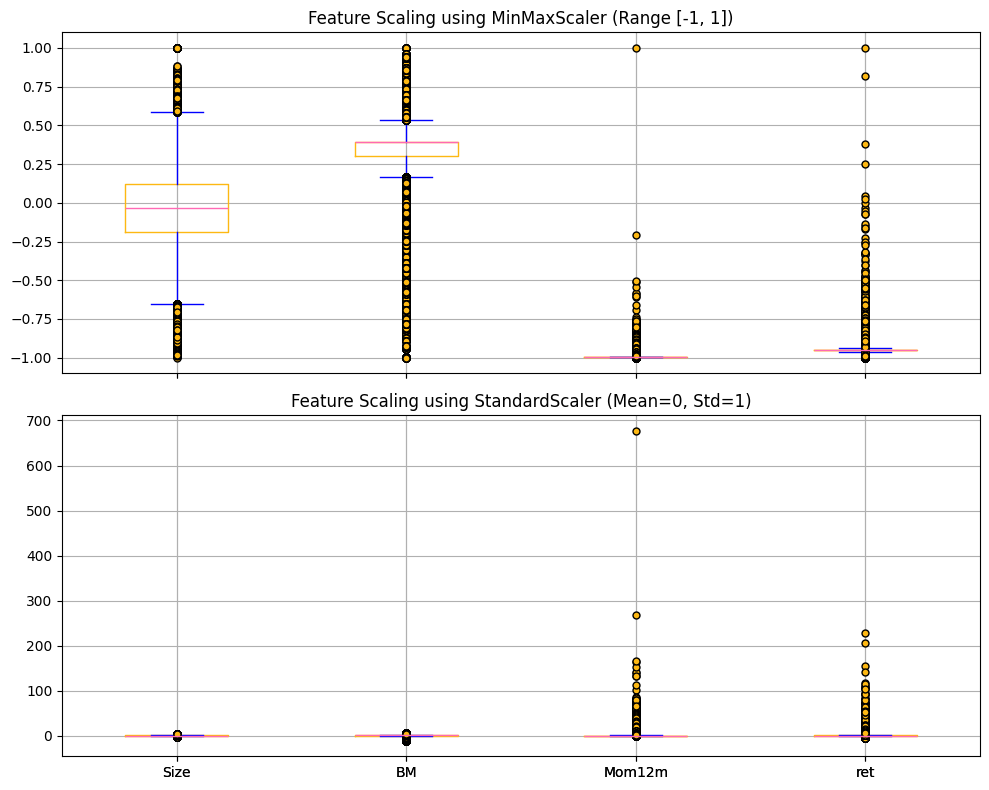

In [ ]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a sample dataset to simulate a few firm-level predictors
key_predictors = ['Size', 'BM', 'Mom12m', 'ret']
df_cleaned_key_predictors = cleaned_data_df[key_predictors]

# Apply MinMaxScaler
minmax_scaler = MinMaxScaler(feature_range=(-1, 1))
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_cleaned_key_predictors), columns=key_predictors)

# Apply StandardScaler
standard_scaler = StandardScaler()
df_standard = pd.DataFrame(standard_scaler.fit_transform(df_cleaned_key_predictors), columns=key_predictors)

# Plot comparison
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Set color styles to match uploaded image: orange boxes, pink medians, black whiskers/caps
box_color = '#FDB813'    # orange-yellow box color
median_color = '#FF69B4'  # hot pink median line
whisker_color = 'blue'
df_minmax.boxplot(ax=axs[0],
                  boxprops=dict(color=box_color),
                  whiskerprops=dict(color=whisker_color),
                  capprops=dict(color=whisker_color),
                  medianprops=dict(color=median_color),
                  flierprops=dict(markerfacecolor=box_color, marker='o', markersize=5))
axs[0].set_title('Feature Scaling using MinMaxScaler (Range [-1, 1])')

df_standard.boxplot(ax=axs[1],
                    boxprops=dict(color=box_color),
                    whiskerprops=dict(color=whisker_color),
                    capprops=dict(color=whisker_color),
                    medianprops=dict(color=median_color),
                    flierprops=dict(markerfacecolor=box_color, marker='o', markersize=5))
axs[1].set_title('Feature Scaling using StandardScaler (Mean=0, Std=1)')

plt.tight_layout()
plt.show()


## Interpreting Boxplots: Feature Scaling Methods

### Top Plot: **MinMaxScaler (Range [-1, 1])**

- **What it does:** Rescales each feature so its minimum value becomes -1 and maximum becomes 1.
- **Interpretation:**
  - All features (`Size`, `BM`, `Mom12m`, `ret`) are squished into the same range.
  - **Still shows outliers clearly**, but within a bounded scale.
  - Box heights vary — some variables (e.g., `BM`, `Size`) have tighter interquartile ranges, while others (`ret`) are more spread out.
  - This method **preserves outliers** and **relative distribution shape**, but compresses everything into a uniform range.


### Bottom Plot: **StandardScaler (Mean = 0, Std = 1)**

- **What it does:** Centers data (mean = 0) and scales it to unit variance (std = 1).
- **Interpretation:**
  - You can see **extreme outliers more prominently** — especially for `Mom12m` and `ret`, which have huge spikes.
  - This scaling exaggerates outliers if they’re far from the mean (some points > 500 or 600 SDs!).
  - More useful for **linear models** and algorithms that assume Gaussian-like input (e.g., logistic regression, PCA).
  
  ---


# Sampling

In [51]:
# Count the number of periods each firm appears in
firm_period_counts = data_df.groupby('permno')['yyyymm'].nunique()

# Find firms with complete or nearly complete data
#total_periods = data_df['yyyymm'].nunique()
#min_periods_threshold = int(total_periods * 0.55)

#complete_firms = firm_period_counts[firm_period_counts >= min_periods_threshold].index.tolist()
#print(f"Found {len(complete_firms)} firms with at least {min_periods_threshold} periods of data (out of {total_periods} total periods)")

# # For these firms, calculate the percentage of non-NaN values for each feature
# filtered_df = data_df[data_df['permno'].isin(complete_firms)]

# # Calculate the percentage of non-NaN values for each firm across all features
# feature_cols = data_df.columns.drop(['permno', 'yyyymm'])
# nan_percentages = filtered_df.groupby('permno')[feature_cols].apply(
#     lambda x: (1 - x.isna().mean()) * 100
# ).mean(axis=1)  # Average across all features

# # Filter firms with high data quality
# data_quality_threshold = 65
# high_quality_firms = nan_percentages[nan_percentages >= data_quality_threshold].index.tolist()
# print(f"Found {len(high_quality_firms)} firms with at least {data_quality_threshold}% non-NaN values")

# Get the final filtered dataframe
NUM_ROWS = 5000000
NUM_ROWS_5M = 5000000
NUM_ROWS_600k = 600000
NUM_ROWS_1M = 1000000
final_df = data_df.sort_values(by='yyyymm', ascending=False).head(NUM_ROWS_1M).replace({-np.inf: np.nan, np.inf: np.nan}) # decreasing order
final_df.fillna(0, inplace=True)
print(f"Original dataframe shape: {data_df.shape}")
print(f"Filtered dataframe shape: {final_df.shape}")

print(f"Original dataframe shape: {data_df.shape} Original Min Date {data_df['yyyymm'].min()} Original Max Date {data_df['yyyymm'].max()}")
print(f"Filtered dataframe shape: {final_df.shape} Filtered Min Date {final_df['yyyymm'].min()} Filtered Max Date {final_df['yyyymm'].max()}")

Original dataframe shape: (4994028, 119)
Filtered dataframe shape: (1000000, 119)
Original dataframe shape: (4994028, 119) Original Min Date 1960-01-01 00:00:00 Original Max Date 2024-12-01 00:00:00
Filtered dataframe shape: (1000000, 119) Filtered Min Date 2015-04-01 00:00:00 Filtered Max Date 2024-12-01 00:00:00


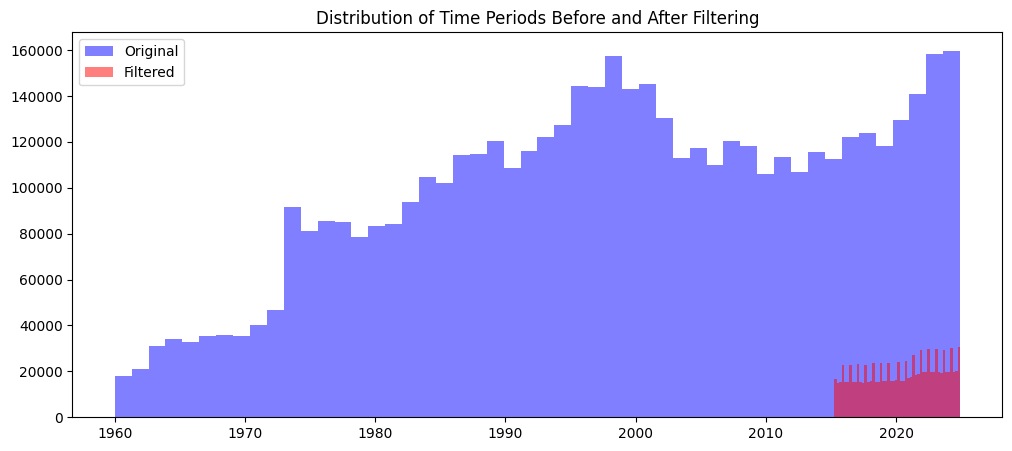

In [52]:
#Plotting the distribution of the across whole period.
plt.figure(figsize=(12,5))
plt.hist(data_df['yyyymm'], bins=50, alpha=0.5, label="Original", color='blue')
plt.hist(final_df['yyyymm'], bins=50, alpha=0.5, label="Filtered", color='red')
plt.legend()
plt.title("Distribution of Time Periods Before and After Filtering")
plt.show()


In [53]:
# Storing the data in a sorted way to keep chronological order for further split
final_df.sort_values(by=['yyyymm'], inplace=True)
final_df.reset_index(drop=True, inplace=True)

final_df

,permno,yyyymm,prc,ret,Price,Size,STreversal,MaxRet,High52,RealizedVol,...,MomSeason06YrPlus,MomOffSeason06YrPlus,grcapx,EntMult,Investment,PctTotAcc,EarnSupBig,EarningsSurprise,BetaTailRisk,CBOperProf
0,24248,2015-04-01,50.30000,-4.6626,-3.918005,-14.704619,4.6626,-0.012760,0.849806,-0.009173,...,0.048973,0.001247,-0.373328,-12.729445,-0.969193,-1.062082,-0.036292,-1.127272,0.393340,0.080879
1,41929,2015-04-01,41.10000,-6.8661,-3.716008,-14.677807,6.8661,-0.022598,0.767794,-0.016282,...,0.100678,0.001858,0.024398,-6.005640,-0.981060,-0.429558,0.000000,0.788884,0.813793,0.156578
2,83188,2015-04-01,17.58000,26.2024,-2.866762,-15.755409,-26.2024,-0.075608,0.717258,-0.024569,...,0.116019,-0.002555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,86551,2015-04-01,13.64000,-0.2391,-2.613007,-10.532726,0.2391,-0.007427,0.964639,-0.004356,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,92054,2015-04-01,2.00000,-7.4074,-0.693147,-11.800553,7.4074,-0.055556,0.787402,-0.018997,...,0.065344,0.017323,0.506835,0.000000,-0.455054,0.280283,-0.295410,-0.289268,0.963476,-0.139368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,23795,2024-12-01,2.42000,-3.2000,-0.883768,-8.702600,3.2000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.221885,0.000000,0.000000,0.000000,0.000000
999996,75241,2024-12-01,0.00000,0.0000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.236193,-0.489375,0.000000,0.000000,0.000000,0.000000
999997,14532,2024-12-01,27.40000,-9.5710,-3.310543,-13.361761,9.5710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
999998,21605,2024-12-01,64.16000,-14.9072,-4.161380,-15.898824,14.9072,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.138213,-1.318626,0.000000,0.000000,0.000000,0.000000


In [54]:
# Keeping just a sample and deleting other dataframes for not wasting the memory
df = final_df.copy()

del final_df
del data_df


# Util functions

In [55]:
def estimate_beta_and_save_predictions(df, train_indices, test_indices):
    """
    Function estimates beta using training data and save CAPM predictions for test data directly in the dataframe

    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame with stock returns and market returns
    train_indices : array-like
        Indices for training period
    test_indices : array-like
        Indices for test period

    Returns:
    --------
    DataFrame with beta estimates and CAPM predictions
    """
    result_df = df.copy()
    result_df['beta'] = np.nan
    result_df['CAPM_Predicted_ExcessReturn'] = np.nan

    # Process each stock separately
    for permno in df['permno'].unique():
        stock_data = df[df['permno'] == permno]

        # Get training data for this stock
        train_data = stock_data[stock_data.index.isin(train_indices)]

        if len(train_data) > 10:  # Require minimum observations
            # Calculate beta based on training data
            cov_stock_market = np.cov(train_data['ExcessReturn'], train_data['MarketExcessReturn'])[0, 1]
            var_market = np.var(train_data['MarketExcessReturn'])

            if var_market != 0:
                beta = cov_stock_market / var_market

                # Apply this beta to test period observations
                test_indices_for_stock = stock_data.index[stock_data.index.isin(test_indices)]
                result_df.loc[test_indices_for_stock, 'beta'] = beta

                # Calculate CAPM predictions directly
                for idx in test_indices_for_stock:
                    market_excess = result_df.loc[idx, 'MarketExcessReturn']
                    result_df.loc[idx, 'CAPM_Predicted_ExcessReturn'] = beta * market_excess

    return result_df

In [56]:
# Out of sample R2 function used in GKX paper
def r2_oos(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred)**2) / np.sum(y_true**2)

In [57]:
def split_with_percentage(df_init, features, target, date_column='date', train_size=0.6, valid_size=0.2, test_size=0.2):
    """
    Splits data into train, validation, and test sets based on specified percentages

    Parameters:
    -----------
    df_init : pandas DataFrame
        The complete dataset
    features : list
        List of feature column names
    target : str
        Name of the target column
    date_column : str
        Name of the date column
    train_size : float
        Percentage of data for training (e.g., 0.6 for 60%)
    valid_size : float
        Percentage of data for validation (e.g., 0.2 for 20%)
    test_size : float
        Percentage of data for testing (e.g., 0.2 for 20%)

    Returns:
    --------
    X_train, y_train, X_valid, y_valid, X_test, y_test
    """
    assert train_size + valid_size + test_size == 1, "Train, validation, and test sizes must sum to 1"

    df = df_init.copy()
    if not pd.api.types.is_datetime64_any_dtype(df[date_column]):
        df[date_column] = pd.to_datetime(df[date_column])

    df = df.sort_values(by=date_column)

    # Determine split indices
    n = len(df)
    train_end = int(n * train_size)
    valid_end = train_end + int(n * valid_size)

    train = df.iloc[:train_end]
    X_train, y_train = train[features], train[target]

    valid = df.iloc[train_end:valid_end]
    X_valid, y_valid = valid[features], valid[target]

    test = df.iloc[valid_end:]
    X_test, y_test = test[features], test[target]

    y_train = y_train.fillna(0)
    y_valid = y_valid.fillna(0)
    y_test = y_test.fillna(0)

    print(f"Training set: {train[date_column].min().strftime('%Y-%m-%d')} to {train[date_column].max().strftime('%Y-%m-%d')}, {len(X_train)} observations")
    print(f"Validation set: {valid[date_column].min().strftime('%Y-%m-%d')} to {valid[date_column].max().strftime('%Y-%m-%d')}, {len(X_valid)} observations")
    print(f"Test set: {test[date_column].min().strftime('%Y-%m-%d')} to {test[date_column].max().strftime('%Y-%m-%d')}, {len(X_test)} observations")

    return X_train, y_train, X_valid, y_valid, X_test, y_test


In [58]:
from sklearn.preprocessing import MinMaxScaler

def clean_scale_data(X_train, X_valid, X_test):
    """
    Scales data using MinMaxScaler within range [-1, 1] and replaces NaNs with 0 before scaling.

    Parameters:
    -----------
    X_train, X_valid, X_test : pandas DataFrame
        Feature sets for training, validation, and test

    Returns:
    --------
    X_train_scaled, X_valid_scaled, X_test_scaled : pandas DataFrame
        Scaled versions of the input datasets
    """
    X_train = X_train.fillna(0)
    X_valid = X_valid.fillna(0)
    X_test = X_test.fillna(0)

    scaler = MinMaxScaler(feature_range=(-1, 1))

    # Fit on training data and transform all splits
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns, index=X_valid.index)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

    # Clip values outside [-1, 1] to enforce the range
    X_valid_scaled = X_valid_scaled.clip(-1, 1)
    X_test_scaled = X_test_scaled.clip(-1, 1)

    return X_train_scaled, X_valid_scaled, X_test_scaled


# Cleaning, scaling, adding necessary variables

Variables: The dataset includes a unique firm identifier (permno), date,
 stock price (prc), stock return in percentage units adjusted for delisting (ret), and a variable named Signed Price (Price). In addition, there are 114 predictor variables (signals).

In [59]:
# Merge the stock's df with treasury bill df based on the date columns
merged_df = pd.merge(df, rf_rates, left_on='yyyymm',
                        right_on='observation_date', how='left')

- dropping duplicate column
- renaming columns for better readability
- adding columns for further use in CAPM return calculation
- replacing nan and infinity values with 0
- sorting by date

In [60]:
merged_df.drop(columns=['observation_date'], inplace=True)
merged_df.rename(columns={'TB3MS': 'riskfree', 'yyyymm': 'date'}, inplace=True)
merged_df.columns = merged_df.columns.str.lower()
merged_df['ExcessReturn'] = merged_df['ret'] - merged_df['riskfree']

merged_df['MarketReturn'] = merged_df.groupby('date')['ret'].transform('mean')
merged_df['MarketExcessReturn'] = merged_df['MarketReturn'] - merged_df['riskfree']

merged_df = merged_df.replace({-np.inf: np.nan, np.inf: np.nan})
merged_df.fillna(0, inplace=True)

merged_df.sort_values(['date', 'permno'], inplace=True)
merged_df.reset_index(drop=True, inplace=True)


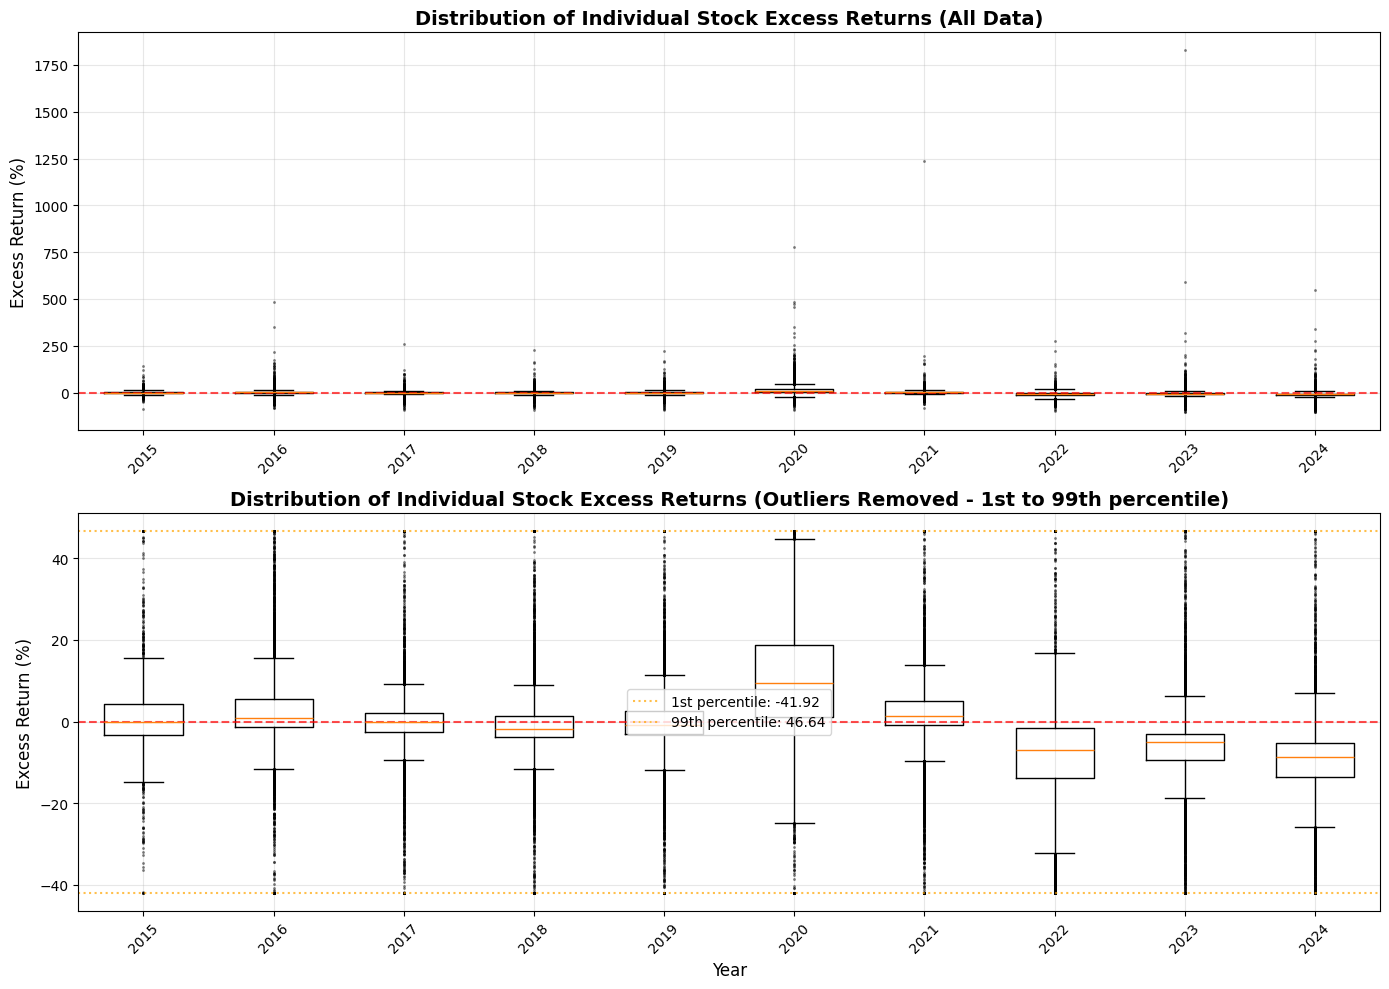

In [61]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [1, 1]})

# Sample every nth month to make the plots readable
n = 12  # sample every 12 months (annual)
sample_dates = sorted(merged_df['date'].unique())[::n]

# First subplot - Original data with all outliers
boxplot_data = []
boxplot_positions = []
date_labels = []

for i, date in enumerate(sample_dates):
    date_data = merged_df[merged_df['date'] == date]['ExcessReturn']
    if len(date_data) > 0:
        boxplot_data.append(date_data)
        boxplot_positions.append(i)
        date_labels.append(date.strftime('%Y'))

# Create boxplot in the first subplot - original data
ax1.boxplot(boxplot_data, positions=boxplot_positions, widths=0.6,
           flierprops={'marker': '.', 'markersize': 2, 'alpha': 0.5})
ax1.set_title('Distribution of Individual Stock Excess Returns (All Data)',
             fontsize=14, fontweight='bold')
ax1.set_ylabel('Excess Return (%)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(boxplot_positions)
ax1.set_xticklabels(date_labels, rotation=45)
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Second subplot - Data with outliers removed
filtered_boxplot_data = []

# Calculate overall percentiles for consistent clipping across all dates
all_returns = merged_df['ExcessReturn'].dropna()
q_low = all_returns.quantile(0.01)  # 1st percentile
q_high = all_returns.quantile(0.99)  # 99th percentile

for i, date in enumerate(sample_dates):
    date_data = merged_df[merged_df['date'] == date]['ExcessReturn']
    if len(date_data) > 0:
        # Clip values to remove outliers
        filtered_data = np.clip(date_data, q_low, q_high)
        filtered_boxplot_data.append(filtered_data)

# Create boxplot in the second subplot - filtered data
ax2.boxplot(filtered_boxplot_data, positions=boxplot_positions, widths=0.6,
           flierprops={'marker': '.', 'markersize': 2, 'alpha': 0.5})
ax2.set_title(f'Distribution of Individual Stock Excess Returns (Outliers Removed - 1st to 99th percentile)',
             fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Excess Return (%)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(boxplot_positions)
ax2.set_xticklabels(date_labels, rotation=45)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)

# Add horizontal lines to show clipping thresholds
ax2.axhline(y=q_low, color='orange', linestyle=':', alpha=0.7,
           label=f'1st percentile: {q_low:.2f}')
ax2.axhline(y=q_high, color='orange', linestyle=':', alpha=0.7,
           label=f'99th percentile: {q_high:.2f}')
ax2.legend()

plt.tight_layout()
plt.show()

This figure illustrates the distribution of individual stock excess returns over time. The top one includes all data and shows  the presence of extreme outliers, likely driven by illiquid stocks, microcaps, or data anomalies. The bottom boxplots trim the data to the 1st–99th percentiles, offering a cleaner view of the return distribution. It illustrates that the majority of stocks have negative median excess returns, and the dispersion of returns has varied over time—wider during volatile periods like the 1970s and 2008–2010.

In [62]:
# Picking the predictors for model use
predictor_vars = [c for c in merged_df.columns if c not in ['permno', 'date', 'prc', 'ret',	'price', 'riskfree', 'ExcessReturn', 'MarketReturn', 'MarketExcessReturn']]
len(predictor_vars)

114

/var/folders/7j/8pz9dqx16j514s66gfbnpf1r0000gn/T/ipykernel_1086/3342410273.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm', orient='h')


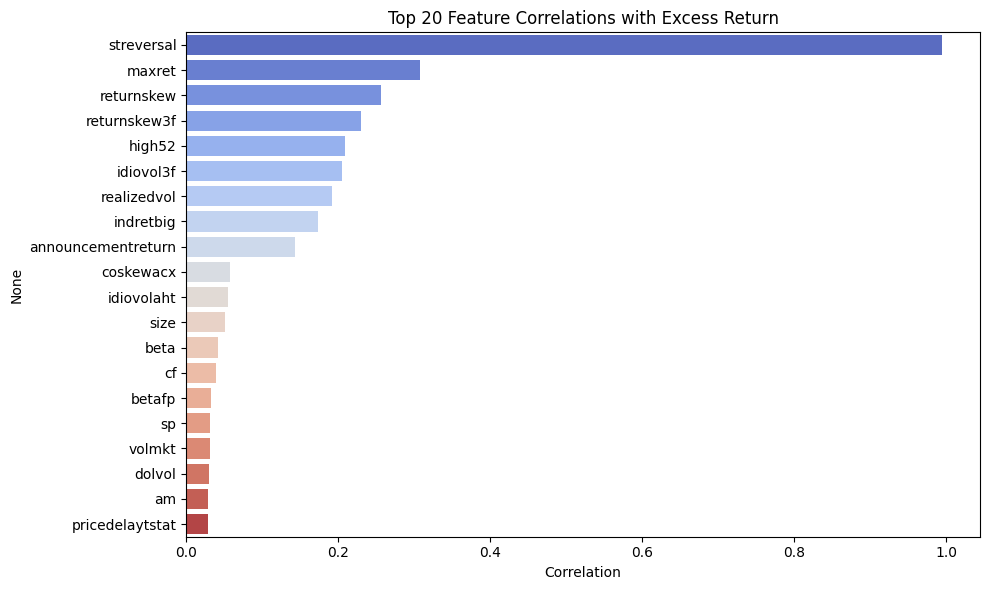

In [63]:
# Compute correlation matrix for predictors + ExcessReturn
corr_matrix = merged_df[predictor_vars + ['ExcessReturn']].corr()

# Get correlations with target variable
corr_target = corr_matrix['ExcessReturn'].drop('ExcessReturn')

# Get top absolute correlations
top_corr = corr_target.abs().sort_values(ascending=False).head(20)  # Top 20 strongest correlations

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm', orient='h')
plt.title("Top 20 Feature Correlations with Excess Return")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()


The plot displays top 20 features correlated with excess return. The strongest predictor is streversal, showing a correlation near 1, indicating it has a very strong linear relationship with future returns. Other top features include returnskew, maxret, and high52, which also show some positive correlation with the target.

/var/folders/7j/8pz9dqx16j514s66gfbnpf1r0000gn/T/ipykernel_1086/961593785.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_pairs.values, y=[f"{i[0]} & {i[1]}" for i in top_corr_pairs.index], palette='coolwarm', orient='h')


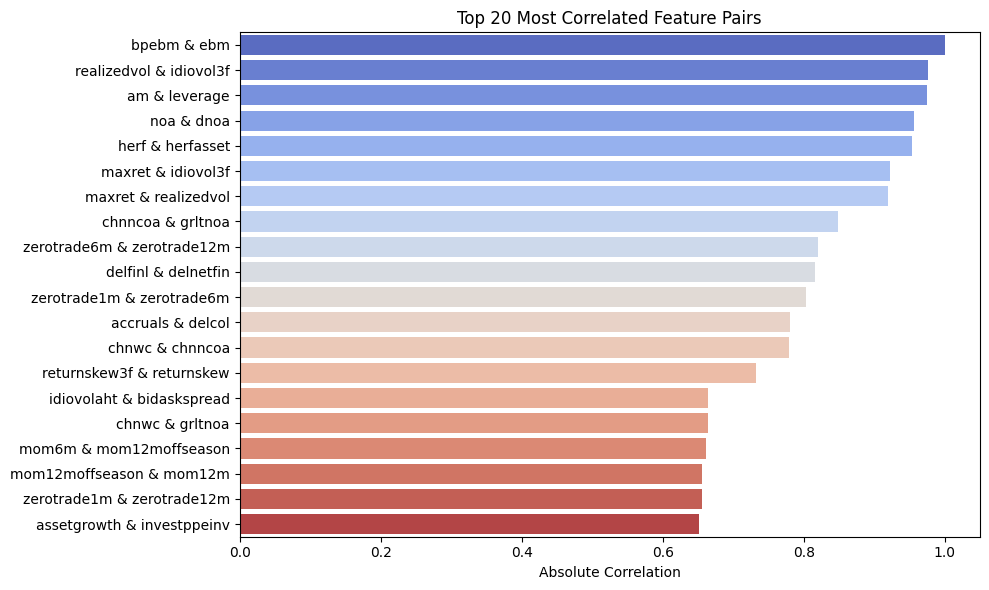

In [64]:
corr_matrix = merged_df[predictor_vars].corr().abs()  # use absolute correlations

# Mask the upper triangle and diagonal (to avoid duplicate pairs)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
masked_corr = corr_matrix.mask(mask)

# Unstack, drop NaNs and sort
corr_pairs = (
    masked_corr
    .unstack()
    .dropna()
    .sort_values(ascending=False)
)

# Get top N most correlated feature pairs
top_n = 20
top_corr_pairs = corr_pairs.head(top_n)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_pairs.values, y=[f"{i[0]} & {i[1]}" for i in top_corr_pairs.index], palette='coolwarm', orient='h')
plt.title(f"Top {top_n} Most Correlated Feature Pairs")
plt.xlabel("Absolute Correlation")
plt.tight_layout()
plt.show()


 The plot highlights the top 20 most correlated feature pairs, based on absolute correlation.
 A threshold was used to choose pairs with potential multicollinearity, which can cause instability in linear models. For each pair, the predictor with more zero entries (which often reflects missing or less informative data) was marked for removal. This can ensure cleaner and more efficient input for modeling, while it keeps the most informative variables within each correlated group.

In [65]:
# Correlation threshold for high collinearity
threshold = 0.8

corr_matrix = merged_df[predictor_vars].corr().abs()

# Get upper triangle mask (excluding self-correlation)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find highly correlated pairs
high_corr_pairs = [(col1, col2, upper.loc[col1, col2])
                   for col1 in upper.columns
                   for col2 in upper.columns
                   if upper.loc[col1, col2] > threshold]

# Evaluate zeros
drop_candidates = []

for col1, col2, corr_val in high_corr_pairs:
    zeros_col1 = (merged_df[col1] == 0).sum()
    zeros_col2 = (merged_df[col2] == 0).sum()
    drop = col1 if zeros_col1 > zeros_col2 else col2
    drop_candidates.append((col1, col2, corr_val, drop))

drop_df = pd.DataFrame(drop_candidates, columns=["Feature 1", "Feature 2", "Correlation", "Drop This"])
drop_df


,Feature 1,Feature 2,Correlation,Drop This
0,maxret,realizedvol,0.919293,realizedvol
1,maxret,idiovol3f,0.921993,idiovol3f
2,realizedvol,idiovol3f,0.975371,idiovol3f
3,zerotrade1m,zerotrade6m,0.802485,zerotrade6m
4,zerotrade6m,zerotrade12m,0.820303,zerotrade12m
5,delfinl,delnetfin,0.815742,delfinl
6,chnncoa,grltnoa,0.847982,grltnoa
7,noa,dnoa,0.955568,noa
8,herf,herfasset,0.952959,herfasset
9,am,leverage,0.974720,leverage


In [66]:
# Ensure values are unique
column_to_drop = list(set(drop_df['Drop This'].values.tolist()))

# Filter predictor_vars
filtered_predictor_vars = [col for col in predictor_vars if col not in column_to_drop]

# predictor_vars = filtered_predictor_vars.copy()
# len(predictor_vars)


We tried with and without these features but the results were nearly the same even after the tuning.

In [67]:
# Keeping approximately the same sizes for samples
# as authors did in the paper
X_train, y_train, X_valid, y_valid, X_test, y_test = split_with_percentage(
    df_init=merged_df,
    features=predictor_vars,
    target='ExcessReturn',
    date_column='date',
    train_size=0.3,
    valid_size=0.15,
    test_size=0.55
)


Training set: 2015-04-01 to 2018-07-01, 300000 observations
Validation set: 2018-07-01 to 2020-02-01, 150000 observations
Test set: 2020-02-01 to 2024-12-01, 550000 observations


In [68]:
# Scaling the sets so the models will be able to use the data more efficiently
X_train_scaled, X_valid_scaled, X_test_scaled = clean_scale_data(X_train, X_valid, X_test)

# CAPM

CAPM:  E[return] = risk_free + betta*(E[market_ret] - risk_free)

E[market_ret] - risk_free is market risk premium

The Capital Asset Pricing Model explains the expected return of an asset as a function of the risk-free rate plus a premium for market risk, scaled by the asset's sensitivity to market movements (beta). It provides a fundamental baseline for pricing risk and estimating cost of equity.

Calculating bettas with combined train and validation splits,
evaluating on test and saving the results for later comparison

In [95]:
merged_df_capm
np.any(np.isnan(merged_df_capm))

np.True_

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Get the indices from split
train_indices = X_train.index
valid_indices = X_valid.index
test_indices = X_test.index

train_valid_indices = np.concatenate([train_indices, valid_indices])

merged_df_capm = estimate_beta_and_save_predictions(merged_df, train_valid_indices, test_indices)

test_data = merged_df_capm.loc[test_indices].dropna(subset=['ExcessReturn', 'CAPM_Predicted_ExcessReturn'])

r_squared_capm = r2_oos(test_data['ExcessReturn'], test_data['CAPM_Predicted_ExcessReturn'])
mae_capm = mean_absolute_error(test_data['ExcessReturn'], test_data['CAPM_Predicted_ExcessReturn'])
mse_capm = mean_squared_error(test_data['ExcessReturn'], test_data['CAPM_Predicted_ExcessReturn'])

print(f"CAPM Model Performance on Test Set:")
print(f"R² = {r_squared_capm:.4f}")
print(f"MAE = {mae_capm:.4f}")
print(f"MSE = {mse_capm:.4f}")



CAPM Model Performance on Test Set:
R² = 0.0729
MAE = 8.6876
MSE = 325.8689


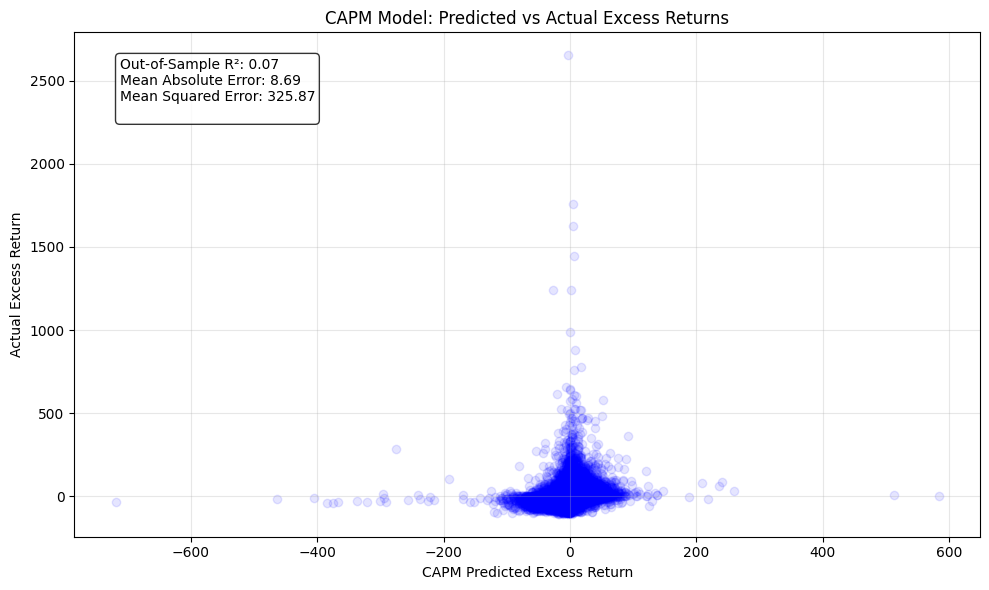

In [70]:
plt.figure(figsize=(10, 6))

# Get the test data and drop rows with missing values for plotting
test_data = merged_df_capm.loc[test_indices]

plt.scatter(test_data['CAPM_Predicted_ExcessReturn'],
           test_data['ExcessReturn'],
           alpha=0.1,
           color='blue')

metrics_text = (
    f"Out-of-Sample R²: {r_squared_capm:.2f}\n"
    f"Mean Absolute Error: {mae_capm:.2f}\n"
    f"Mean Squared Error: {mse_capm:.2f}\n"
)

plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


plt.title('CAPM Model: Predicted vs Actual Excess Returns')
plt.xlabel('CAPM Predicted Excess Return')
plt.ylabel('Actual Excess Return')

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Key observations:

- Scale Discrepancy: There's a significant scale difference between the predicted and actual values,which indicates that CAPM fails to capture extreme market movements.
- Concentration around Zero: The majority of points are centered around zero for both predicted and actual returns. This suggests that most of the time, both CAPM predictions and actual returns are modest in magnitude.
- Poor Predictive Power: There's only a very weak relationship between the predicted and actual values. If CAPM were a perfect predictor, points would follow a diagonal line from bottom-left to top-right. Instead, we see an almost horizontal elliptical form, suggesting that CAPM predictions have limited ability to explain variation in actual returns.
- Asymmetric Outliers: The presence of extreme positive outliers but no corresponding extreme negative outliers might indicate either a data issue or a real phenomenon where stocks can experience dramatic upside movement that the CAPM model fails to predict.
- Prediction Range: CAPM's predictions are much more conservative than the actual volatility observed in the market. The model predicts within a narrower range than what actually occurs.

This graph illustrates a challenge in financial modeling - linear models like CAPM struggle to capture the fat-tailed nature of financial returns. This is  why machine learning models can improve predictions with non linear algorithms.

# ML models

In [71]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
import time
import os
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.cross_decomposition import PLSRegression
from sklearn.inspection import permutation_importance
import matplotlib.gridspec as gridspec
from sklearn.model_selection import PredefinedSplit, ParameterGrid
from joblib import Parallel, delayed


# Evaluation functions

In [72]:
def evaluate_model(model, model_name, X_train, y_train, X_valid, y_valid, X_test, y_test):
    print(f"---{model_name} Evaluation---")

    print(f"\nTraining...")
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f"Training completed in {train_time:.2f} seconds")

    train_pred = model.predict(X_train)

    print("\nGenerating predictions...")
    start_time = time.time()
    valid_pred = model.predict(X_valid)
    test_pred = model.predict(X_test)
    pred_time = time.time() - start_time
    print(f"Prediction completed in {pred_time:.2f} seconds")

    print("\nCalculating metrics...")
    results = {
        'train_mse': mean_squared_error(y_train, train_pred),
        'train_r2_oos': r2_oos(y_train, train_pred),
        'valid_mse': mean_squared_error(y_valid, valid_pred),
        'valid_r2_oos': r2_oos(y_valid, valid_pred),
        'test_mse': mean_squared_error(y_test, test_pred),
        'test_r2_oos': r2_oos(y_test, test_pred),
        'train_time': train_time,
        'pred_time': pred_time #test + valid
    }

    results['train_pred'] = train_pred
    results['valid_pred'] = valid_pred
    results['test_pred'] = test_pred

    print(f"""Train R² OOS: {results['train_r2_oos']:.2f} \nValidation R² OOS: {results['valid_r2_oos']:.2f} \nTest R² OOS: {results['test_r2_oos']:.2f}
              """)

    return results

In [73]:
def plot_pca_explained_variance(X, max_components=None):
    """
    Create a PCA explained variance plot to help choose the number of components.
    """
    if max_components is None:
        max_components = min(X.shape[0], X.shape[1])
    else:
        max_components = min(max_components, min(X.shape[0], X.shape[1]))

    pca = PCA(n_components=max_components)
    pca.fit(X)

    # Calculate cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-', linewidth=2)
    plt.grid(True, alpha=0.6)
    plt.xlabel('Number of Components', fontsize=12)
    plt.ylabel('Cumulative Explained Variance', fontsize=12)
    plt.title('PCA Explained Variance', fontsize=14)

    if len(cumulative_variance) > 10:  # Only calculate elbow if we have enough points
        # Calculate approximate second derivative (discrete)
        diffs = np.diff(cumulative_variance, 2)
        elbow_index = np.argmin(diffs) + 2  # +2 because of two diff operations

        # Mark the elbow point
        plt.plot(elbow_index + 1, cumulative_variance[elbow_index], 'ko', markersize=8)
        plt.axvline(x=elbow_index + 1, color='k', linestyle='--', alpha=0.7)
        plt.annotate(f'Elbow: {elbow_index + 1} components\n({cumulative_variance[elbow_index]:.2f} variance)',
                    xy=(elbow_index + 1, cumulative_variance[elbow_index]),
                    xytext=(elbow_index + 10, cumulative_variance[elbow_index] - 0.1),
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

    plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5)
    plt.annotate('95% explained variance',
                xy=(max_components/2, 0.95),
                xytext=(max_components/2, 0.9),
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
                ha='center')

    plt.tight_layout()
    plt.show()

    return {
        'explained_variance_ratio': pca.explained_variance_ratio_,
        'cumulative_variance': cumulative_variance,
        'n_components_95': np.argmax(cumulative_variance >= 0.95) + 1,
        'elbow_point': elbow_index + 1 if len(cumulative_variance) > 10 else None
    }


In [74]:
def pls_predict(model, X):
    pred = model.predict(X)
    # Ensure output is 1D
    if pred.ndim > 1 and pred.shape[1] == 1:
        pred = pred.ravel()
    return pred

In [75]:
# PLS-specific evaluation function
def evaluate_model_pls(model, model_name, X_train, y_train, X_valid, y_valid, X_test, y_test):
    print(f"Training PLS...")
    start_time = time.time()

    model.fit(X_train, y_train)

    train_time = time.time() - start_time
    print(f"Training completed in {train_time:.2f} seconds")

    print("Generating predictions...")
    start_time = time.time()

    # Direct prediction without unpacking
    train_pred = model.predict(X_train)
    if train_pred.ndim > 1 and train_pred.shape[1] == 1:
        train_pred = train_pred.ravel()

    valid_pred = model.predict(X_valid)
    if valid_pred.ndim > 1 and valid_pred.shape[1] == 1:
        valid_pred = valid_pred.ravel()

    test_pred = model.predict(X_test)
    if test_pred.ndim > 1 and test_pred.shape[1] == 1:
        test_pred = test_pred.ravel()

    pred_time = time.time() - start_time
    print(f"Prediction completed in {pred_time:.2f} seconds")

    print("Calculating metrics...")
    train_mse = mean_squared_error(y_train, train_pred)
    train_r2_oos = r2_oos(y_train, train_pred)
    valid_mse = mean_squared_error(y_valid, valid_pred)
    valid_r2_oos = r2_oos(y_valid, valid_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    test_r2_oos = r2_oos(y_test, test_pred)

    results = {
        'train_mse': train_mse,
        'train_r2_oos': train_r2_oos,
        'valid_mse': valid_mse,
        'valid_r2_oos': valid_r2_oos,
        'test_mse': test_mse,
        'test_r2_oos': test_r2_oos,
        'train_time': train_time,
        'pred_time': pred_time
    }

    results['train_pred'] = train_pred
    results['valid_pred'] = valid_pred
    results['test_pred'] = test_pred

    print(f"Train R² OOS: {train_r2_oos:.2f}")
    print(f"Validation R² OOS: {valid_r2_oos:.2f}")
    print(f"Test R² OOS: {test_r2_oos:.2f}")

    return results

In [76]:
def get_feature_importance(model, X, y, feature_names):
    """
    Extract feature importance from different types of models.
    For tree-based models, use built-in feature_importances_.
    For linear models, use coefficient magnitude.
    For other models, calculate permutation importance.
    """
    importances = None
    used_feature_names = feature_names

    # For tree-based models
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

    # For linear models
    elif hasattr(model, 'coef_'):
        # For multi-output models, mean of coefficients
        if model.coef_.ndim > 1:
            importances = np.abs(model.coef_).mean(axis=0)
        else:
            importances = np.abs(model.coef_)

    # For PLS
    elif hasattr(model, 'x_loadings_'):
        importances = np.abs(model.x_loadings_).sum(axis=1)

    # For Pipeline objects
    elif hasattr(model, 'steps'):
        # Try to get importances from the last step
        final_step = model.steps[-1][1]

        # For PCA + Linear Regression pipeline, check the transformed feature count
        if 'pca' in [name for name, _ in model.steps]:
            pca_step = model.named_steps['pca']
            n_components = pca_step.n_components_
            # Create generic feature names for PCA components
            used_feature_names = [f'PC_{i+1}' for i in range(n_components)]

            # Get importances from final step
            if hasattr(final_step, 'coef_'):
                if final_step.coef_.ndim > 1:
                    importances = np.abs(final_step.coef_).mean(axis=0)
                else:
                    importances = np.abs(final_step.coef_)
        # For polynomial + linear regression
        elif 'poly' in [name for name, _ in model.steps]:
            poly_step = model.named_steps['poly']
            # Using generic names
            if hasattr(final_step, 'coef_'):
                importances = np.abs(final_step.coef_)
                used_feature_names = [f'poly_feature_{i}' for i in range(len(importances))]
        else:
            if hasattr(final_step, 'feature_importances_'):
                importances = final_step.feature_importances_
            elif hasattr(final_step, 'coef_'):
                if final_step.coef_.ndim > 1:
                    importances = np.abs(final_step.coef_).mean(axis=0)
                else:
                    importances = np.abs(final_step.coef_)

    # Fallback: use permutation importance
    if importances is None:
        try:
            perm_importance = permutation_importance(model, X, y, n_repeats=5, random_state=42)
            importances = perm_importance.importances_mean
        except Exception as e:
            print(f"Could not compute permutation importance for {model.__class__.__name__}: {str(e)}")

            importances = np.ones(len(used_feature_names))

    # Handle the case where importances length doesn't match feature_names length
    if importances is not None and len(importances) != len(used_feature_names):
        print(f"Warning: Importance array length ({len(importances)}) doesn't match feature names length ({len(used_feature_names)})")
        # Create generic feature names of the correct length
        used_feature_names = [f'feature_{i}' for i in range(len(importances))]

    importance_df = pd.DataFrame({
        'feature': used_feature_names,
        'importance': importances
    })

    # Normalize importances to sum to 1
    if importance_df['importance'].sum() > 0:
        importance_df['importance'] = importance_df['importance'] / importance_df['importance'].sum()

    return importance_df.sort_values('importance', ascending=False)


In [77]:
def plot_feature_importance(model_results, models, X_train, y_train, feature_names, n_features=20, ncols=2, figsize=(16, 24)):
    # Filter models that have been trained
    model_names = [name for name in models.keys() if name in model_results]

    # Calculate number of rows needed
    nrows = (len(model_names) + ncols - 1) // ncols

    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(nrows, ncols)

    for i, model_name in enumerate(model_names):
        row, col = i // ncols, i % ncols
        ax = fig.add_subplot(gs[row, col])

        model = models[model_name]

        importance_df = get_feature_importance(model, X_train, y_train, feature_names)

        top_features = importance_df.head(n_features)

        ax.barh(np.arange(len(top_features)), top_features['importance'], color='steelblue')
        ax.set_yticks(np.arange(len(top_features)))
        ax.set_yticklabels(top_features['feature'])
        ax.set_title(model_name)
        ax.set_xlabel('Importance')
        ax.invert_yaxis()  # To have the most important feature at the top
        ax.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    return fig


# ------------

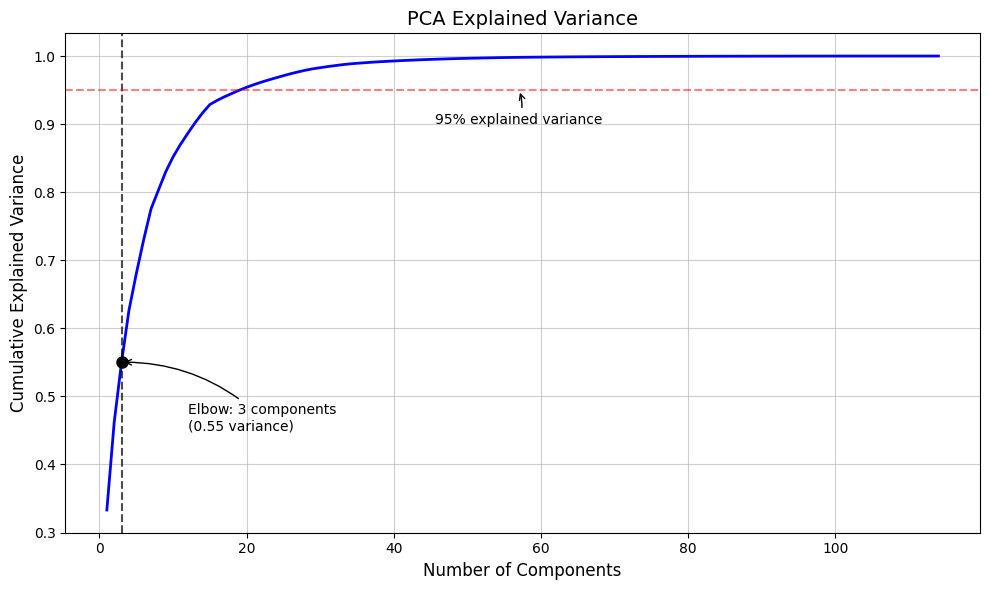

Number of components needed for 95% variance: 20
Elbow point occurs at 3 components


In [78]:
variance_info = plot_pca_explained_variance(X_train_scaled, max_components=130)

print(f"Number of components needed for 95% variance: {variance_info['n_components_95']}")
if variance_info['elbow_point']:
    print(f"Elbow point occurs at {variance_info['elbow_point']} components")


In [79]:
N_PC = 20

# Training

In [80]:
models = {
    'Linear Regression': LinearRegression(),

    # Regularized regression models
    'Ridge': Ridge(alpha=10.0, random_state=42),
    'Lasso': Lasso(alpha=0.1, random_state=42, max_iter=5000),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.7, random_state=42, max_iter=5000),


    'Linear Regression with PCA': Pipeline([
        ('pca', PCA(n_components=N_PC, random_state=42)),
        ('linear', LinearRegression())
    ]),

    'Ridge with PCA': Pipeline([
        ('pca', PCA(n_components=N_PC, random_state=42)),
        ('ridge', Ridge(alpha=10.0, random_state=42))
    ]),

    'Lasso with PCA': Pipeline([
        ('pca', PCA(n_components=N_PC, random_state=42)),
        ('lasso', Lasso(alpha=0.1, random_state=42, max_iter=5000))
    ]),

    'Elastic Net with PCA': Pipeline([
        ('pca', PCA(n_components=N_PC, random_state=42)),
        ('elasticnet', ElasticNet(alpha=0.1, l1_ratio=0.7, random_state=42, max_iter=5000))
    ]),

    # SVM Regression - using linear kernel for large datasets
    #'SVM Regression': SVR(kernel='linear', C=1.0, epsilon=0.1),

    # Dimensionality reduction models
    'Principal Component Regression': Pipeline([
        ('pca', PCA(n_components=N_PC, random_state=42)),
        ('ridge', Ridge(alpha=10.0, random_state=42))
    ]),

    'Partial Least Squares': PLSRegression(n_components=N_PC, scale=False),

    'Polynomial Regression': Pipeline([
        ('pca', PCA(n_components=N_PC, random_state=42)),
        ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ('ridge', Ridge(alpha=10.0, random_state=42))
    ]),


    # Tree-based models
    # 'Random Forest': RandomForestRegressor(
    #     n_estimators=N_PC,
    #     max_depth=3,
    #     min_samples_leaf=500,
    #     max_features='sqrt',
    #     bootstrap=True,
    #     random_state=42,
    #     n_jobs=-1
    # ),

    # 'Gradient Boosting': GradientBoostingRegressor(
    #     n_estimators=N_PC,
    #     max_depth=3,
    #     learning_rate=0.1,
    #     subsample=0.8,
    #     min_samples_leaf=500,
    #     random_state=42
    # )

}

In [81]:
print(f"\nStarting model training and evaluation...\n")

model_results = {}

for name in tqdm(list(models.keys()), desc="Models"):
    model = models[name]

    # Special handling for PLS which has different predict behavior
    if name == 'Partial Least Squares':
        model_results[name] = evaluate_model_pls(
            model, name,
            X_train_scaled[predictor_vars], y_train,
            X_valid_scaled[predictor_vars], y_valid,
            X_test_scaled[predictor_vars], y_test
        )
    else:
        model_results[name] = evaluate_model(
            model, name,
            X_train_scaled[predictor_vars], y_train,
            X_valid_scaled[predictor_vars], y_valid,
            X_test_scaled[predictor_vars], y_test
        )


Starting model training and evaluation...



Models:   0%|          | 0/11 [00:00<?, ?it/s]

---Linear Regression Evaluation---

Training...
Training completed in 2.67 seconds

Generating predictions...


Models:   9%|▉         | 1/11 [00:05<00:50,  5.00s/it]

Prediction completed in 0.28 seconds

Calculating metrics...
Train R² OOS: 1.00 
Validation R² OOS: 0.99 
Test R² OOS: 0.95
              
---Ridge Evaluation---

Training...
Training completed in 0.38 seconds

Generating predictions...
Prediction completed in 0.09 seconds

Calculating metrics...
Train R² OOS: 0.98 
Validation R² OOS: 0.97 
Test R² OOS: 0.93
              


Models:  18%|█▊        | 2/11 [00:06<00:24,  2.75s/it]

---Lasso Evaluation---

Training...


Models:  27%|██▋       | 3/11 [00:07<00:17,  2.20s/it]

Training completed in 0.81 seconds

Generating predictions...
Prediction completed in 0.09 seconds

Calculating metrics...
Train R² OOS: 0.77 
Validation R² OOS: 0.75 
Test R² OOS: 0.70
              
---Elastic Net Evaluation---

Training...


Models:  36%|███▋      | 4/11 [00:09<00:13,  1.88s/it]

Training completed in 0.67 seconds

Generating predictions...
Prediction completed in 0.09 seconds

Calculating metrics...
Train R² OOS: 0.12 
Validation R² OOS: 0.10 
Test R² OOS: 0.05
              
---Linear Regression with PCA Evaluation---

Training...
Training completed in 0.38 seconds

Generating predictions...


Models:  45%|████▌     | 5/11 [00:10<00:09,  1.66s/it]

Prediction completed in 0.20 seconds

Calculating metrics...
Train R² OOS: 0.12 
Validation R² OOS: 0.10 
Test R² OOS: 0.05
              
---Ridge with PCA Evaluation---

Training...
Training completed in 0.26 seconds

Generating predictions...


Models:  55%|█████▍    | 6/11 [00:11<00:07,  1.49s/it]

Prediction completed in 0.20 seconds

Calculating metrics...
Train R² OOS: 0.12 
Validation R² OOS: 0.10 
Test R² OOS: 0.05
              
---Lasso with PCA Evaluation---

Training...
Training completed in 0.28 seconds

Generating predictions...


Models:  64%|██████▎   | 7/11 [00:12<00:05,  1.37s/it]

Prediction completed in 0.16 seconds

Calculating metrics...
Train R² OOS: 0.12 
Validation R² OOS: 0.10 
Test R² OOS: 0.05
              
---Elastic Net with PCA Evaluation---

Training...
Training completed in 0.29 seconds

Generating predictions...


Models:  73%|███████▎  | 8/11 [00:13<00:03,  1.30s/it]

Prediction completed in 0.18 seconds

Calculating metrics...
Train R² OOS: 0.10 
Validation R² OOS: 0.09 
Test R² OOS: 0.04
              
---Principal Component Regression Evaluation---

Training...
Training completed in 0.25 seconds

Generating predictions...


Models:  82%|████████▏ | 9/11 [00:14<00:02,  1.24s/it]

Prediction completed in 0.17 seconds

Calculating metrics...
Train R² OOS: 0.12 
Validation R² OOS: 0.10 
Test R² OOS: 0.05
              
Training PLS...
Training completed in 6.12 seconds
Generating predictions...


Models:  91%|█████████ | 10/11 [00:22<00:03,  3.19s/it]

Prediction completed in 0.84 seconds
Calculating metrics...
Train R² OOS: 0.88
Validation R² OOS: 0.88
Test R² OOS: 0.87
---Polynomial Regression Evaluation---

Training...
Training completed in 1.76 seconds

Generating predictions...


Models: 100%|██████████| 11/11 [00:27<00:00,  2.51s/it]

Prediction completed in 1.96 seconds

Calculating metrics...
Train R² OOS: 0.20 
Validation R² OOS: 0.17 
Test R² OOS: 0.09
              


In [82]:
print("\nModel Comparison (Test R² OOS):")
print(f'CAPM: {r_squared_capm:.3f}')
for name, results in model_results.items():
    print(f"{name}:\n test:{results['test_r2_oos']:.3f} train:{results['train_r2_oos']:.3f} val:{results['valid_r2_oos']:.3f}")


Model Comparison (Test R² OOS):
CAPM: 0.073
Linear Regression:
 test:0.950 train:0.998 val:0.988
Ridge:
 test:0.926 train:0.982 val:0.968
Lasso:
 test:0.702 train:0.768 val:0.746
Elastic Net:
 test:0.052 train:0.116 val:0.099
Linear Regression with PCA:
 test:0.052 train:0.124 val:0.105
Ridge with PCA:
 test:0.052 train:0.124 val:0.105
Lasso with PCA:
 test:0.051 train:0.119 val:0.101
Elastic Net with PCA:
 test:0.042 train:0.105 val:0.087
Principal Component Regression:
 test:0.052 train:0.124 val:0.105
Partial Least Squares:
 test:0.866 train:0.876 val:0.876
Polynomial Regression:
 test:0.087 train:0.195 val:0.171


In [83]:
def plot_overfitting_assessment(model_results, r_squared_capm):
    """
    Create a visualization to detect overfitting by comparing R² across training, validation and test sets
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Extract model names and R² values
    model_names = ['CAPM'] + list(model_results.keys())
    train_r2 = [np.nan]  # CAPM doesn't have train R²
    valid_r2 = [np.nan]  # CAPM doesn't have validation R²
    test_r2 = [r_squared_capm]

    for name, results in model_results.items():
        train_r2.append(results['train_r2_oos'])
        valid_r2.append(results['valid_r2_oos'])
        test_r2.append(results['test_r2_oos'])

    fig, ax = plt.subplots(figsize=(14, 8))

    bar_width = 0.25

    # Set position of bars on x axis
    r1 = np.arange(len(model_names))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # Create bars
    train_bars = ax.bar(r1, train_r2, width=bar_width, label='Train', color='skyblue', alpha=0.8)
    valid_bars = ax.bar(r2, valid_r2, width=bar_width, label='Validation', color='lightgreen', alpha=0.8)
    test_bars = ax.bar(r3, test_r2, width=bar_width, label='Test', color='salmon', alpha=0.8)

    ax.set_xlabel('Models', fontweight='bold', fontsize=12)
    ax.set_ylabel('R² OOS', fontweight='bold', fontsize=12)
    ax.set_title('Model Performance Comparison Across Datasets', fontweight='bold', fontsize=14)
    ax.set_xticks([r + bar_width for r in range(len(model_names))])
    ax.set_xticklabels(model_names, rotation=45, ha='right')

    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)

    ax.legend()

    ax.grid(True, linestyle='--', alpha=0.3)

    overfitting_threshold = 0.15

    for i in range(1, len(model_names)):  # Skip CAPM
        if train_r2[i] is not None and test_r2[i] is not None:
            gap = train_r2[i] - test_r2[i]

            if gap > 0:
                ax.text(r1[i] + bar_width, max(train_r2[i], valid_r2[i] if valid_r2[i] is not None else 0) + 0.02,
                       f'Gap: {gap:.2f}', ha='center', fontsize=9,
                       color='red' if gap > overfitting_threshold else 'blue')


    plt.tight_layout()
    return fig

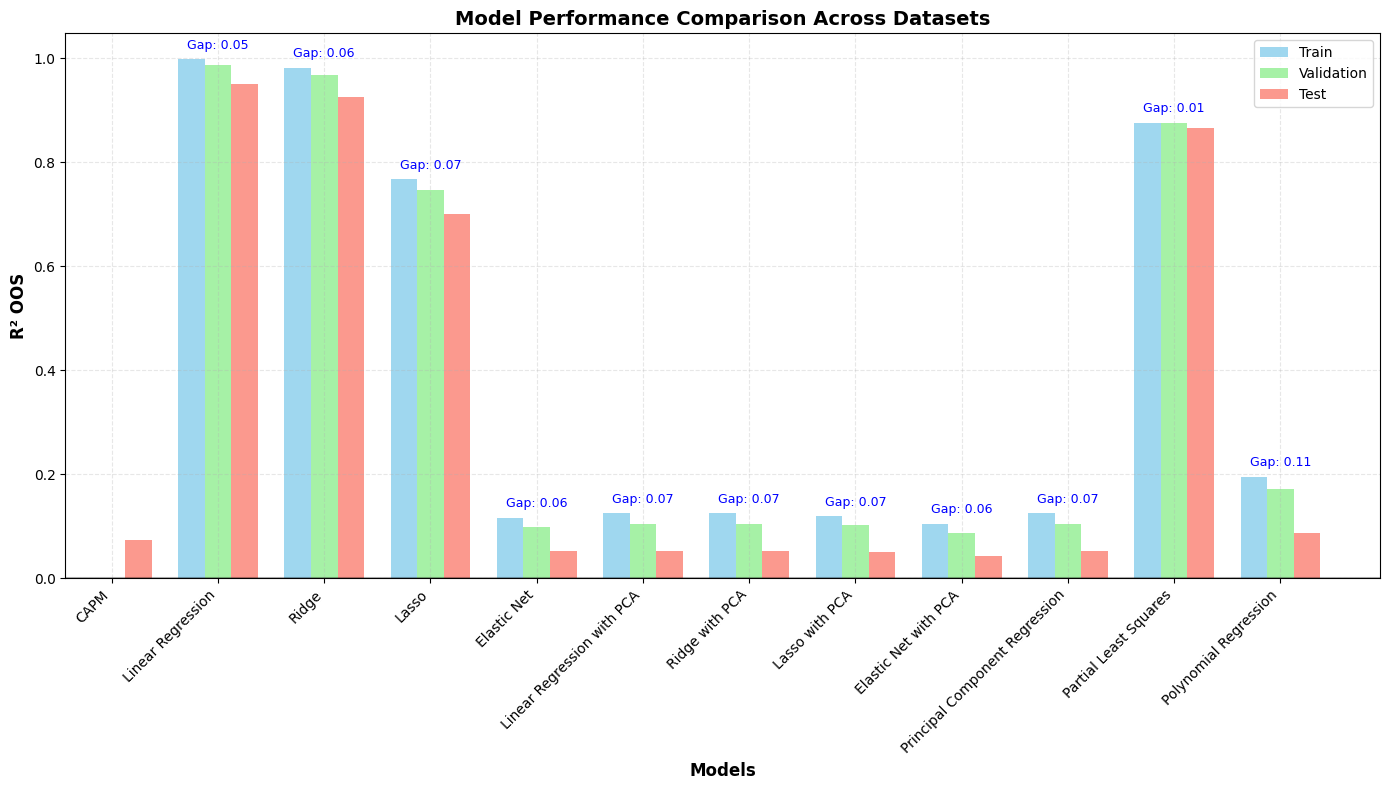

In [84]:
fig2 = plot_overfitting_assessment(model_results, r_squared_capm)
plt.show()

In [85]:
import math

def plot_model_comparison(model_results, merged_df_capm, test_indices, y_test):
    # Determine the grid layout based on number of models
    num_models = len(model_results)
    cols = min(3, num_models)
    rows = math.ceil(num_models / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharex=True, sharey=True)

    # Flatten axs if it's a multi-dimensional array
    if rows > 1 or cols > 1:
        axs = axs.flatten()
    else:
        axs = [axs]  # Convert to list if there's only one subplot

    # Get test data for CAPM
    test_data = merged_df_capm.loc[test_indices]

    # Plot each model in its own subplot
    for i, (name, results) in enumerate(model_results.items()):
        model_pred = results['test_pred']

        axs[i].scatter(model_pred, y_test,
                    alpha=0.15,
                    color='green',
                    label=name)


        axs[i].scatter(test_data['CAPM_Predicted_ExcessReturn'],
                    test_data['ExcessReturn'],
                    alpha=0.05,
                    color='blue',
                    label='CAPM')


        axs[i].set_title(f'{name} vs CAPM')
        axs[i].set_xlabel('Predicted Excess Return')
        axs[i].set_ylabel('Actual Excess Return')
        axs[i].grid(True, alpha=0.2)
        axs[i].legend()

        metrics_text = (
            f"{name} R² OOS: {results['test_r2_oos']:.4f}\n"
            f"CAPM R² OOS: {r_squared_capm:.4f}"
        )
        axs[i].text(0.05, 0.95, metrics_text,
                transform=axs[i].transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Hide any unused subplots
    for j in range(num_models, len(axs)):
        axs[j].set_visible(False)

    plt.suptitle('Comparison of Machine Learning Models vs CAPM Benchmark',
                fontsize=16, fontweight='bold', y=0.98)

    plt.tight_layout()
    fig.subplots_adjust(top=0.93)

    plt.show()


/var/folders/7j/8pz9dqx16j514s66gfbnpf1r0000gn/T/ipykernel_1086/2711694594.py:59: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/arshad/Documents/prog/python/env/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


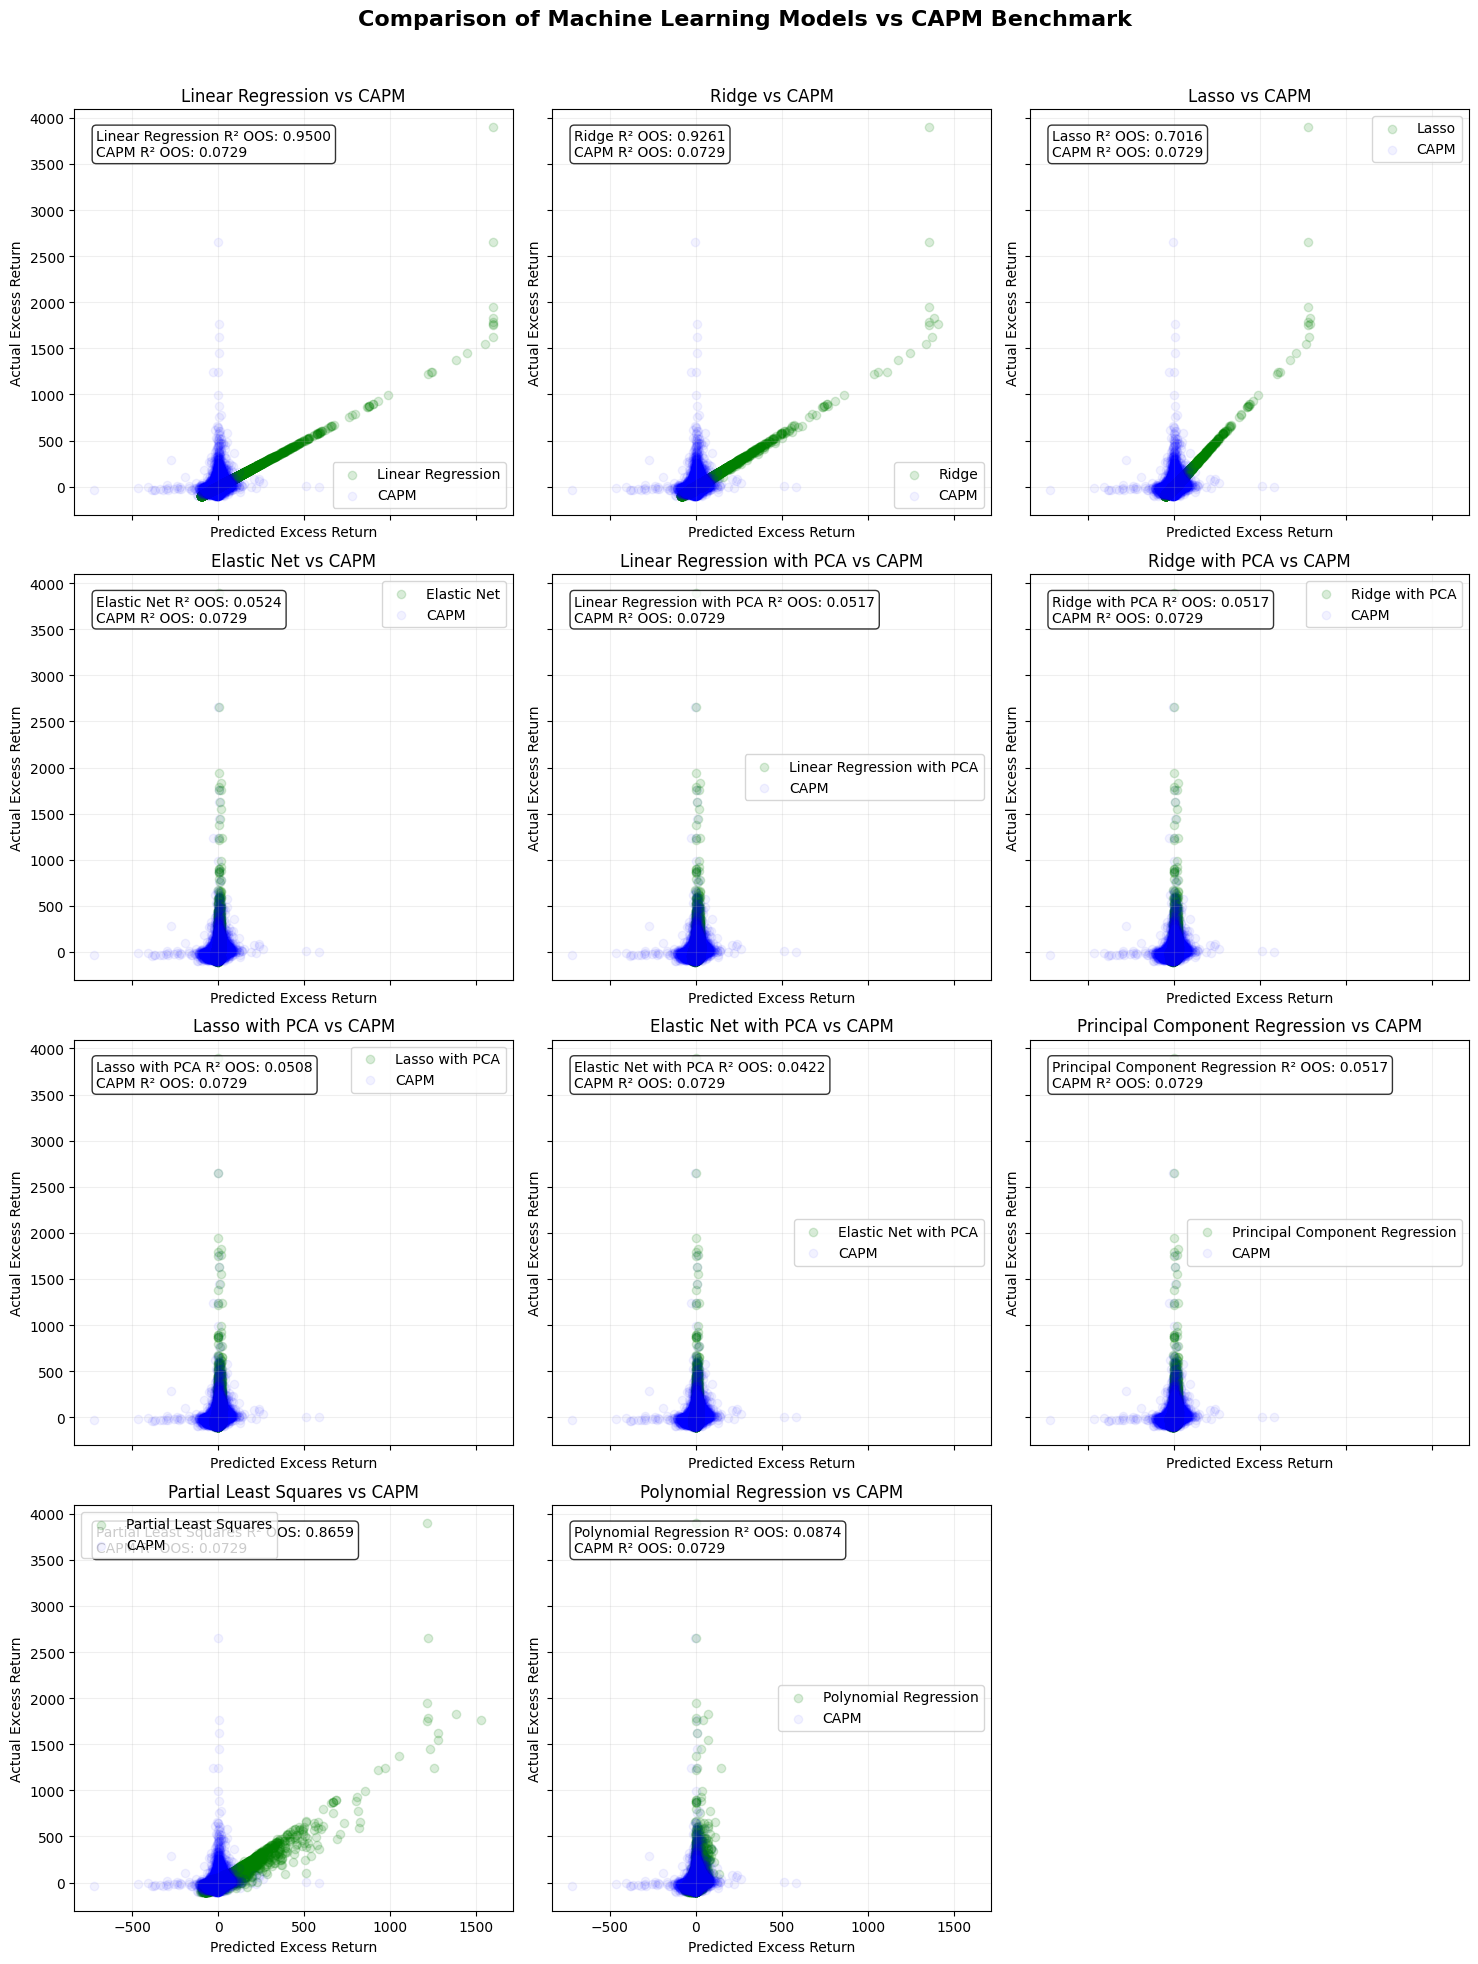

In [86]:
plot_model_comparison(model_results, merged_df_capm, test_indices, y_test)

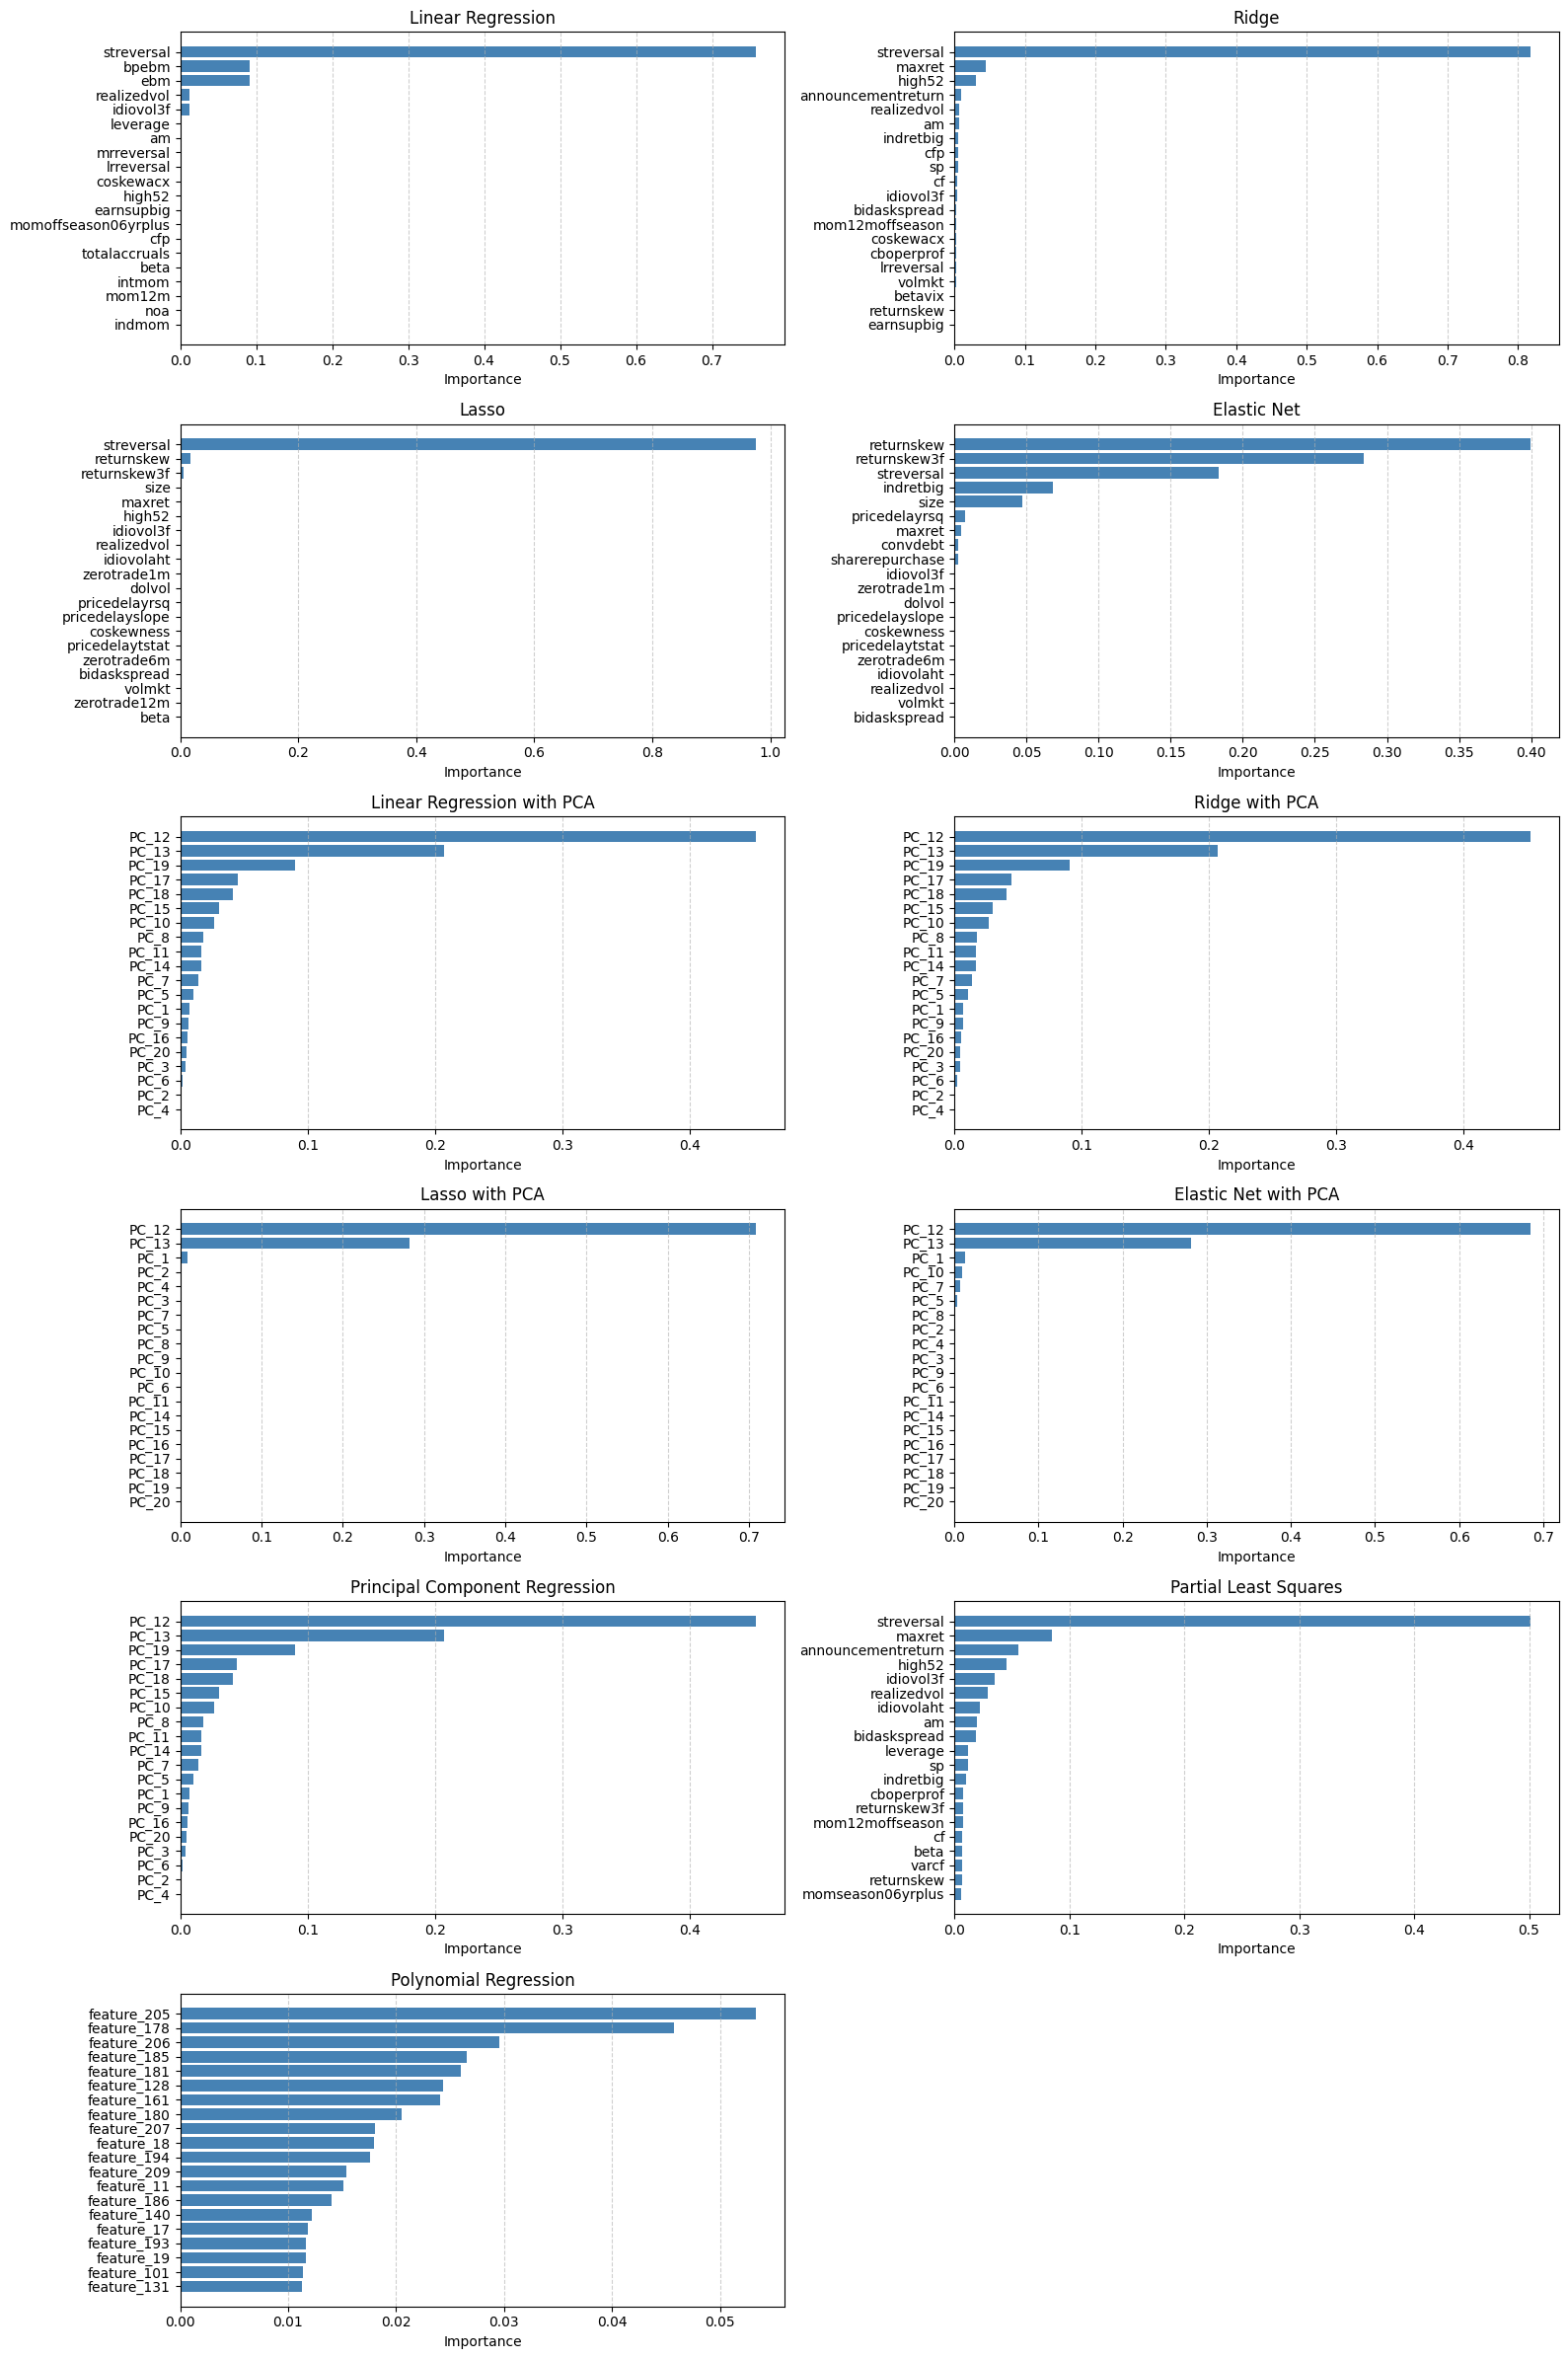

In [87]:
fig = plot_feature_importance(
    model_results=model_results,
    models=models,
    X_train=X_train_scaled[predictor_vars],
    y_train=y_train,
    feature_names=predictor_vars if isinstance(X_train_scaled, pd.DataFrame) else [f'feature_{i}' for i in range(X_train_scaled.shape[1])],
    n_features=20,
    ncols=2,
    figsize=(16, 24)
)

plt.show()

# Tuning

In [88]:
def tune_model_params(model_name, X_train, y_train, X_valid, y_valid, param_grid):
    """
    Tune hyperparameters for a given model using validation data with focus on r2_oos

    Returns:
    --------
    dict
        Best parameters and model
    """
    best_val_r2 = -np.inf  # We want to maximize R² OOS
    best_params = None
    best_model = None

    # Convert param_grid to list of parameter combinations
    grid = list(ParameterGrid(param_grid))

    # Define function to evaluate a parameter set
    def evaluate_params(params):
        try:
            if model_name == 'Linear Regression':
                # Linear regression doesn't have parameters to tune
                model = LinearRegression()

            elif model_name == 'Ridge':
                model = Ridge(alpha=params['alpha'], random_state=42)

            elif model_name == 'Lasso':
                model = Lasso(alpha=params['alpha'], max_iter=10000, random_state=42)

            elif model_name == 'Elastic Net':
                model = ElasticNet(alpha=params['alpha'], l1_ratio=params['l1_ratio'],
                                  max_iter=10000, random_state=42)

            # PCA Pipeline models
            elif model_name == 'Linear Regression with PCA':
                model = Pipeline([
                    ('pca', PCA(n_components=params['pca__n_components'], random_state=42)),
                    ('linear', LinearRegression())
                ])

            elif model_name == 'Ridge with PCA':
                model = Pipeline([
                    ('pca', PCA(n_components=params['pca__n_components'], random_state=42)),
                    ('ridge', Ridge(alpha=params['ridge__alpha'], random_state=42))
                ])

            elif model_name == 'Lasso with PCA':
                model = Pipeline([
                    ('pca', PCA(n_components=params['pca__n_components'], random_state=42)),
                    ('lasso', Lasso(alpha=params['lasso__alpha'], max_iter=10000, random_state=42))
                ])

            elif model_name == 'Elastic Net with PCA':
                model = Pipeline([
                    ('pca', PCA(n_components=params['pca__n_components'], random_state=42)),
                    ('elasticnet', ElasticNet(alpha=params['elasticnet__alpha'],
                                            l1_ratio=params['elasticnet__l1_ratio'],
                                            max_iter=10000, random_state=42))
                ])

            elif model_name == 'Principal Component Regression':
                model = Pipeline([
                    ('pca', PCA(n_components=params['pca__n_components'], random_state=42)),
                    ('ridge', Ridge(alpha=params['ridge__alpha'], random_state=42))
                ])

            elif model_name == 'Partial Least Squares':
                model = PLSRegression(n_components=params['n_components'], scale=False)

            elif model_name == 'Polynomial Regression':
                model = Pipeline([
                    ('pca', PCA(n_components=params['pca__n_components'], random_state=42)),
                    ('poly', PolynomialFeatures(degree=params['poly__degree'],
                                               interaction_only=True, include_bias=False)),
                    ('ridge', Ridge(alpha=params['ridge__alpha'], random_state=42))
                ])

            elif model_name == 'Random Forest':
                model = RandomForestRegressor(
                    n_estimators=params['n_estimators'],
                    max_depth=params['max_depth'],
                    min_samples_leaf=params['min_samples_leaf'],
                    max_features=params['max_features'],
                    bootstrap=True,
                    random_state=42,
                    n_jobs=-1
                )

            elif model_name == 'Gradient Boosting':
                model = GradientBoostingRegressor(
                    n_estimators=params['n_estimators'],
                    max_depth=params['max_depth'],
                    learning_rate=params['learning_rate'],
                    subsample=params['subsample'],
                    min_samples_leaf=params['min_samples_leaf'],
                    random_state=42
                )

            else:
                print(f"Unknown model: {model_name}")
                return -np.inf, params, None

            model.fit(X_train, y_train)

            # if isinstance(X_train, pd.DataFrame):
            #     model.fit(X_train.values, y_train)
            #     valid_preds = model.predict(X_valid.values)
            # else:
            #     model.fit(X_train, y_train)
            #     valid_preds = model.predict(X_valid)


            # Make validation predictions
            valid_preds = model.predict(X_valid)

            # Flatten predictions if needed
            if hasattr(valid_preds, 'shape') and len(valid_preds.shape) > 1:
                valid_preds = valid_preds.flatten()

            r2_value = r2_oos(y_valid, valid_preds)

            return r2_value, params, model

        except Exception as e:
            print(f"Error with {model_name}, params: {params}. Error: {e}")
            return -np.inf, params, None

    # Evaluate all parameter combinations
    results = Parallel(n_jobs=3)(delayed(evaluate_params)(params) for params in grid)

    # Find the best parameters (highest R² OOS)
    for r2_value, params, model in results:
        if r2_value > best_val_r2:
            best_val_r2 = r2_value
            best_params = params
            best_model = model

    return {
        'best_params': best_params,
        'best_model': best_model,
        'best_val_r2': best_val_r2
    }

In [89]:
# Define parameter grids for each model with adjusted hyperparameters to reduce overfitting
param_grids = {
    'Linear Regression': {},  # No parameters to tune

    'Ridge': {
        'alpha': [0.1, 1.0, 10.0, 50.0, 100.0, 200.0]  # Expanded alpha range
    },

    'Lasso': {
        'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 5.0]
    },

    'Elastic Net': {
        'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],  # Higher alpha values
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    },

    'Linear Regression with PCA': {
        'pca__n_components': [5, 10, 15, 20]  # Reduced from N_PC to prevent overfitting
    },

    'Ridge with PCA': {
        'pca__n_components': [5, 10, 15, 20],  # Reduced components
        'ridge__alpha': [1.0, 10.0, 50.0, 100.0]  # Higher regularization
    },

    'Lasso with PCA': {
        'pca__n_components': [5, 10, 15, 20],
        'lasso__alpha': [0.1, 0.5, 1.0, 5.0]
    },

    'Elastic Net with PCA': {
        'pca__n_components': [5, 10, 15, 20],
        'elasticnet__alpha': [0.5, 1.0, 5.0, 10.0],
        'elasticnet__l1_ratio': [0.3, 0.5, 0.7]
    },

    'Principal Component Regression': {
        'pca__n_components': [5, 10, 15, 20],
        'ridge__alpha': [1.0, 10.0, 50.0, 100.0]
    },

    'Partial Least Squares': {
        'n_components': [2, 5, 8, 10, 15]
    },

    'Polynomial Regression': {
        'pca__n_components': [5, 8, 10, 15],  # Reduced components
        'poly__degree': [1, 2],  # Consider lower degree
        'ridge__alpha': [10.0, 50.0, 100.0, 200.0]  # Stronger regularization
    },

    'Random Forest': {
        'n_estimators': [10, 15, 20, 25],
        'max_depth': [2, 3, 5],
        'min_samples_leaf': [500, 1000, 2000],  # Increased to prevent overfitting
        'max_features': ['sqrt', 'log2', 0.3]  # Add feature subsampling options
    }

    # 'Gradient Boosting': {
    #     'n_estimators': [50, 100, 200],
    #     'max_depth': [1, 2, 3],  # Shallower trees
    #     'learning_rate': [0.01, 0.05, 0.1],  # Consider even smaller learning rates
    #     'subsample': [0.5, 0.7, 0.8],
    #     'min_samples_leaf': [500, 1000, 2000]  # Larger leaf size
    # }
}

We tried to tune gradient boosting, but that was runing too long without results (about 12 hours). Although, as it has the most promising results, it worth trying to tune and get better parameters.

In [90]:
def tune_and_evaluate_all_models(X_train, y_train, X_valid, y_valid, X_test, y_test,
                                capm_pred_test=None):
    """
    Train and evaluate all models with tuned parameters

    Returns:
    --------
    dict
        Dictionary with tuned models and performance metrics
    """
    models_dict = {}
    performance = {}

    for model_name in tqdm(param_grids.keys(), desc="Tuning models"):
        print(f"\nTuning {model_name}...")

        # Skip models that are too computationally expensive
        if model_name == 'SVM Regression' and X_train.shape[0] > 10000:
            print(f"Skipping {model_name} due to large dataset size")
            continue

        # Get parameter grid for the model
        param_grid = param_grids[model_name]

        result = tune_model_params(model_name, X_train, y_train, X_valid, y_valid, param_grid)

        best_params = result['best_params']
        best_val_r2 = result.get('best_val_r2', None)

        if best_params is None:
            print(f"Failed to tune {model_name}")
            continue

        # Retrain on combined train+valid data
        X_train_valid = np.vstack([X_train, X_valid])
        y_train_valid = np.concatenate([y_train, y_valid])

        # Create a new model with the best parameters instead of reusing the trained one
        try:
            if model_name == 'Linear Regression':
                final_model = LinearRegression()

            elif model_name == 'Ridge':
                final_model = Ridge(alpha=best_params['alpha'], random_state=42)

            elif model_name == 'Lasso':
                final_model = Lasso(alpha=best_params['alpha'], max_iter=10000, random_state=42)

            elif model_name == 'Elastic Net':
                final_model = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'],
                                        max_iter=10000, random_state=42)

            # PCA Pipeline models
            elif model_name == 'Linear Regression with PCA':
                final_model = Pipeline([
                    ('pca', PCA(n_components=best_params['pca__n_components'], random_state=42)),
                    ('linear', LinearRegression())
                ])

            elif model_name == 'Ridge with PCA':
                final_model = Pipeline([
                    ('pca', PCA(n_components=best_params['pca__n_components'], random_state=42)),
                    ('ridge', Ridge(alpha=best_params['ridge__alpha'], random_state=42))
                ])

            elif model_name == 'Lasso with PCA':
                final_model = Pipeline([
                    ('pca', PCA(n_components=best_params['pca__n_components'], random_state=42)),
                    ('lasso', Lasso(alpha=best_params['lasso__alpha'], max_iter=10000, random_state=42))
                ])

            elif model_name == 'Elastic Net with PCA':
                final_model = Pipeline([
                    ('pca', PCA(n_components=best_params['pca__n_components'], random_state=42)),
                    ('elasticnet', ElasticNet(alpha=best_params['elasticnet__alpha'],
                                            l1_ratio=best_params['elasticnet__l1_ratio'],
                                            max_iter=10000, random_state=42))
                ])

            elif model_name == 'Principal Component Regression':
                final_model = Pipeline([
                    ('pca', PCA(n_components=best_params['pca__n_components'], random_state=42)),
                    ('ridge', Ridge(alpha=best_params['ridge__alpha'], random_state=42))
                ])

            elif model_name == 'Partial Least Squares':
                final_model = PLSRegression(n_components=best_params['n_components'], scale=False)

            elif model_name == 'Polynomial Regression':
                final_model = Pipeline([
                    ('pca', PCA(n_components=best_params['pca__n_components'], random_state=42)),
                    ('poly', PolynomialFeatures(degree=best_params['poly__degree'],
                                               interaction_only=True, include_bias=False)),
                    ('ridge', Ridge(alpha=best_params['ridge__alpha'], random_state=42))
                ])

            elif model_name == 'Random Forest':
                final_model = RandomForestRegressor(
                    n_estimators=best_params['n_estimators'],
                    max_depth=best_params['max_depth'],
                    min_samples_leaf=best_params['min_samples_leaf'],
                    max_features=best_params['max_features'],
                    bootstrap=True,
                    random_state=42,
                    n_jobs=-1
                )

            elif model_name == 'Gradient Boosting':
                final_model = GradientBoostingRegressor(
                    n_estimators=best_params['n_estimators'],
                    max_depth=best_params['max_depth'],
                    learning_rate=best_params['learning_rate'],
                    subsample=best_params['subsample'],
                    min_samples_leaf=best_params['min_samples_leaf'],
                    random_state=42
                )

            else:
                print(f"Unknown model: {model_name}")
                continue


            final_model.fit(X_train_valid, y_train_valid)

        except Exception as e:
            print(f"Error creating model with best parameters: {e}")
            continue


        train_preds = final_model.predict(X_train)
        valid_preds = final_model.predict(X_valid)
        test_preds = final_model.predict(X_test)

        # Flatten predictions if needed
        if hasattr(test_preds, 'shape') and len(test_preds.shape) > 1:
            train_preds = train_preds.flatten()
            valid_preds = valid_preds.flatten()
            test_preds = test_preds.flatten()

        # Calculate R² OOS for all splits
        train_r2_oos = r2_oos(y_train, train_preds)
        valid_r2_oos = r2_oos(y_valid, valid_preds)
        test_r2_oos = r2_oos(y_test, test_preds)

        # Calculate MSE
        test_mse = mean_squared_error(y_test, test_preds)

        # Calculate R² against CAPM if provided
        r2_vs_capm = None
        if capm_pred_test is not None:
            capm_mse = mean_squared_error(y_test, capm_pred_test)
            r2_vs_capm = 1 - (test_mse / capm_mse)

        # Store results
        models_dict[model_name] = final_model
        performance[model_name] = {
            'best_params': best_params,
            'train_r2_oos': train_r2_oos,
            'valid_r2_oos': valid_r2_oos,
            'test_r2_oos': test_r2_oos,
            'best_val_r2': best_val_r2,
            'test_mse': test_mse,
            'r2_vs_capm': r2_vs_capm,
            'train_pred': train_preds,
            'valid_pred': valid_preds,
            'test_pred': test_preds
        }

        print(f"{model_name} Results:")
        print(f"  Train R² OOS: {train_r2_oos:.4f}")
        print(f"  Valid R² OOS: {valid_r2_oos:.4f}")
        print(f"  Test R² OOS: {test_r2_oos:.4f}")
        if r2_vs_capm is not None:
            print(f"  R² vs CAPM: {r2_vs_capm:.4f}")
        print(f"  Best parameters: {best_params}")

    return {
        'models': models_dict,
        'performance': performance
    }

In [91]:
capm_predictions = merged_df_capm.loc[test_indices, 'CAPM_Predicted_ExcessReturn'].values


In [92]:
results = tune_and_evaluate_all_models(
    X_train_scaled, y_train,
    X_valid_scaled, y_valid,
    X_test_scaled, y_test,
    capm_pred_test=capm_predictions
)

Tuning models:   0%|          | 0/12 [00:00<?, ?it/s]


Tuning Linear Regression...


/Users/arshad/Documents/prog/python/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/arshad/Documents/prog/python/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/Users/arshad/Documents/prog/python/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
Tuning models:   0%|          | 0/12 [00:11<?, ?it/s]


ValueError: Input contains NaN.

In [ ]:
tuned_model_results = results['performance']
tuned_model_results

{'Linear Regression': {'best_params': {},
  'train_r2_oos': np.float64(0.9581360855920464),
  'valid_r2_oos': np.float64(0.9759784327596277),
  'test_r2_oos': np.float64(0.8534561048200033),
  'best_val_r2': np.float64(0.8387771084491218),
  'test_mse': 23.912847666741307,
  'r2_vs_capm': 0.8283990922505586,
  'train_pred': array([ -7.49958237,  -6.11585575,  -3.43844281, ...,  -3.63824985,
         -20.77145684, -12.28437782]),
  'valid_pred': array([ -5.8510326 ,   0.46902758, -14.24818282, ...,  -4.59701542,
          -7.40100299,  -3.58037091]),
  'test_pred': array([ -6.35523162, -19.99002065,  -2.63898998, ..., -10.39458773,
           6.98795693,  -0.37202904])},
 'Ridge': {'best_params': {'alpha': 10.0},
  'train_r2_oos': np.float64(0.9578522764731796),
  'valid_r2_oos': np.float64(0.9761810457913687),
  'test_r2_oos': np.float64(0.8543228301364986),
  'best_val_r2': np.float64(0.8395184584768521),
  'test_mse': 23.771416524646966,
  'r2_vs_capm': 0.8294140158056977,
  'train_p

In [ ]:
tuned_model_results = results['performance']

print("\nModel Comparison (Test R² OOS):")
print(f'CAPM: {r_squared_capm:.3f}')
for name, results in tuned_model_results.items():
    print(f"{name}:\n test:{results['test_r2_oos']:.3f} train:{results['train_r2_oos']:.3f} val:{results['valid_r2_oos']:.3f}")


Model Comparison (Test R² OOS):
CAPM: 0.146
Linear Regression:
 test:0.853 train:0.958 val:0.976
Ridge:
 test:0.854 train:0.958 val:0.976
Lasso:
 test:0.806 train:0.929 val:0.963
Elastic Net:
 test:0.346 train:0.572 val:0.542
Linear Regression with PCA:
 test:-0.025 train:0.294 val:0.227
Ridge with PCA:
 test:-0.025 train:0.294 val:0.227
Lasso with PCA:
 test:-0.021 train:0.289 val:0.222
Elastic Net with PCA:
 test:-0.091 train:0.190 val:0.119
Principal Component Regression:
 test:-0.025 train:0.294 val:0.227
Partial Least Squares:
 test:0.852 train:0.952 val:0.970
Polynomial Regression:
 test:0.017 train:0.316 val:0.243
Random Forest:
 test:0.633 train:0.850 val:0.820


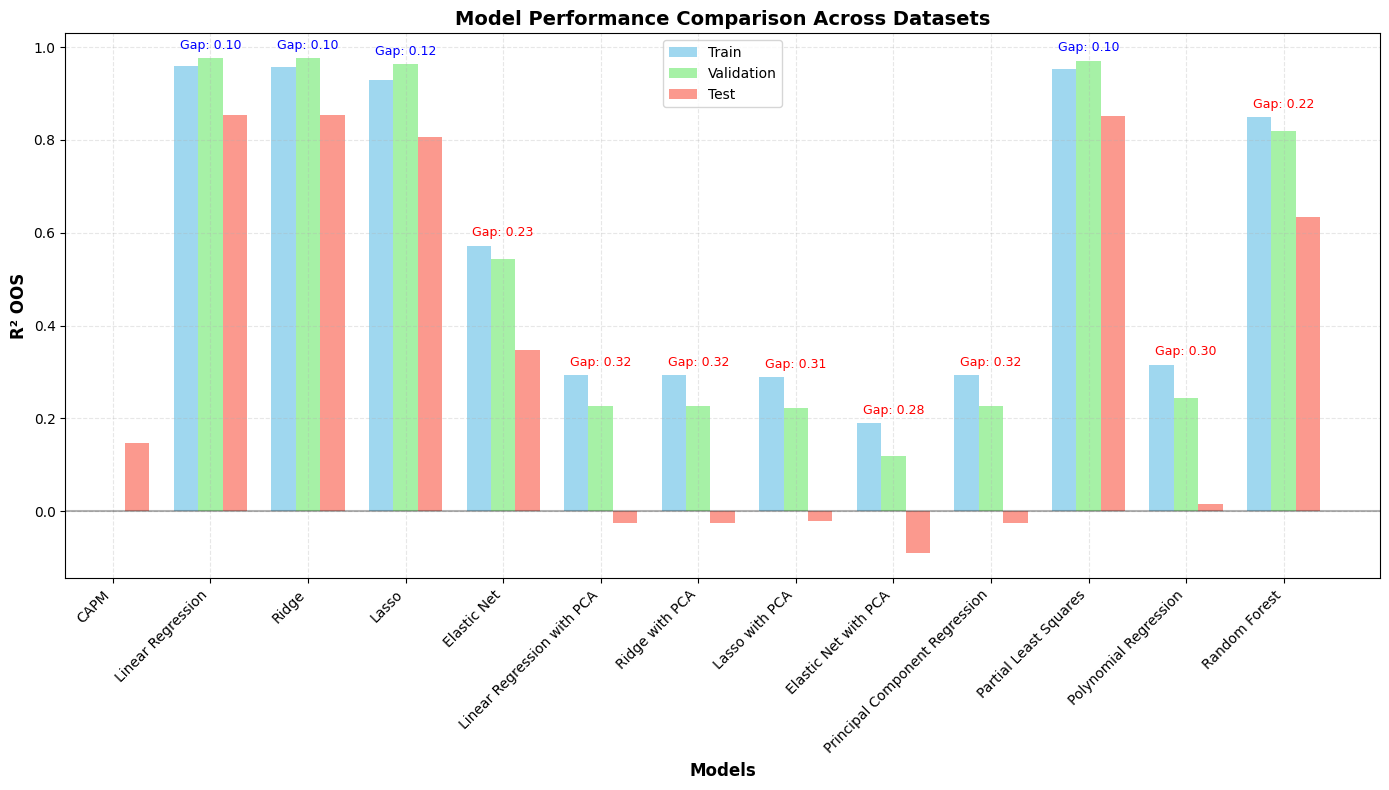

In [ ]:
fig_t = plot_overfitting_assessment(tuned_model_results, r_squared_capm)
plt.show()

C:\Users\Irina Gevorgyan\AppData\Local\Temp\ipykernel_5980\2711694594.py:59: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Irina Gevorgyan\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


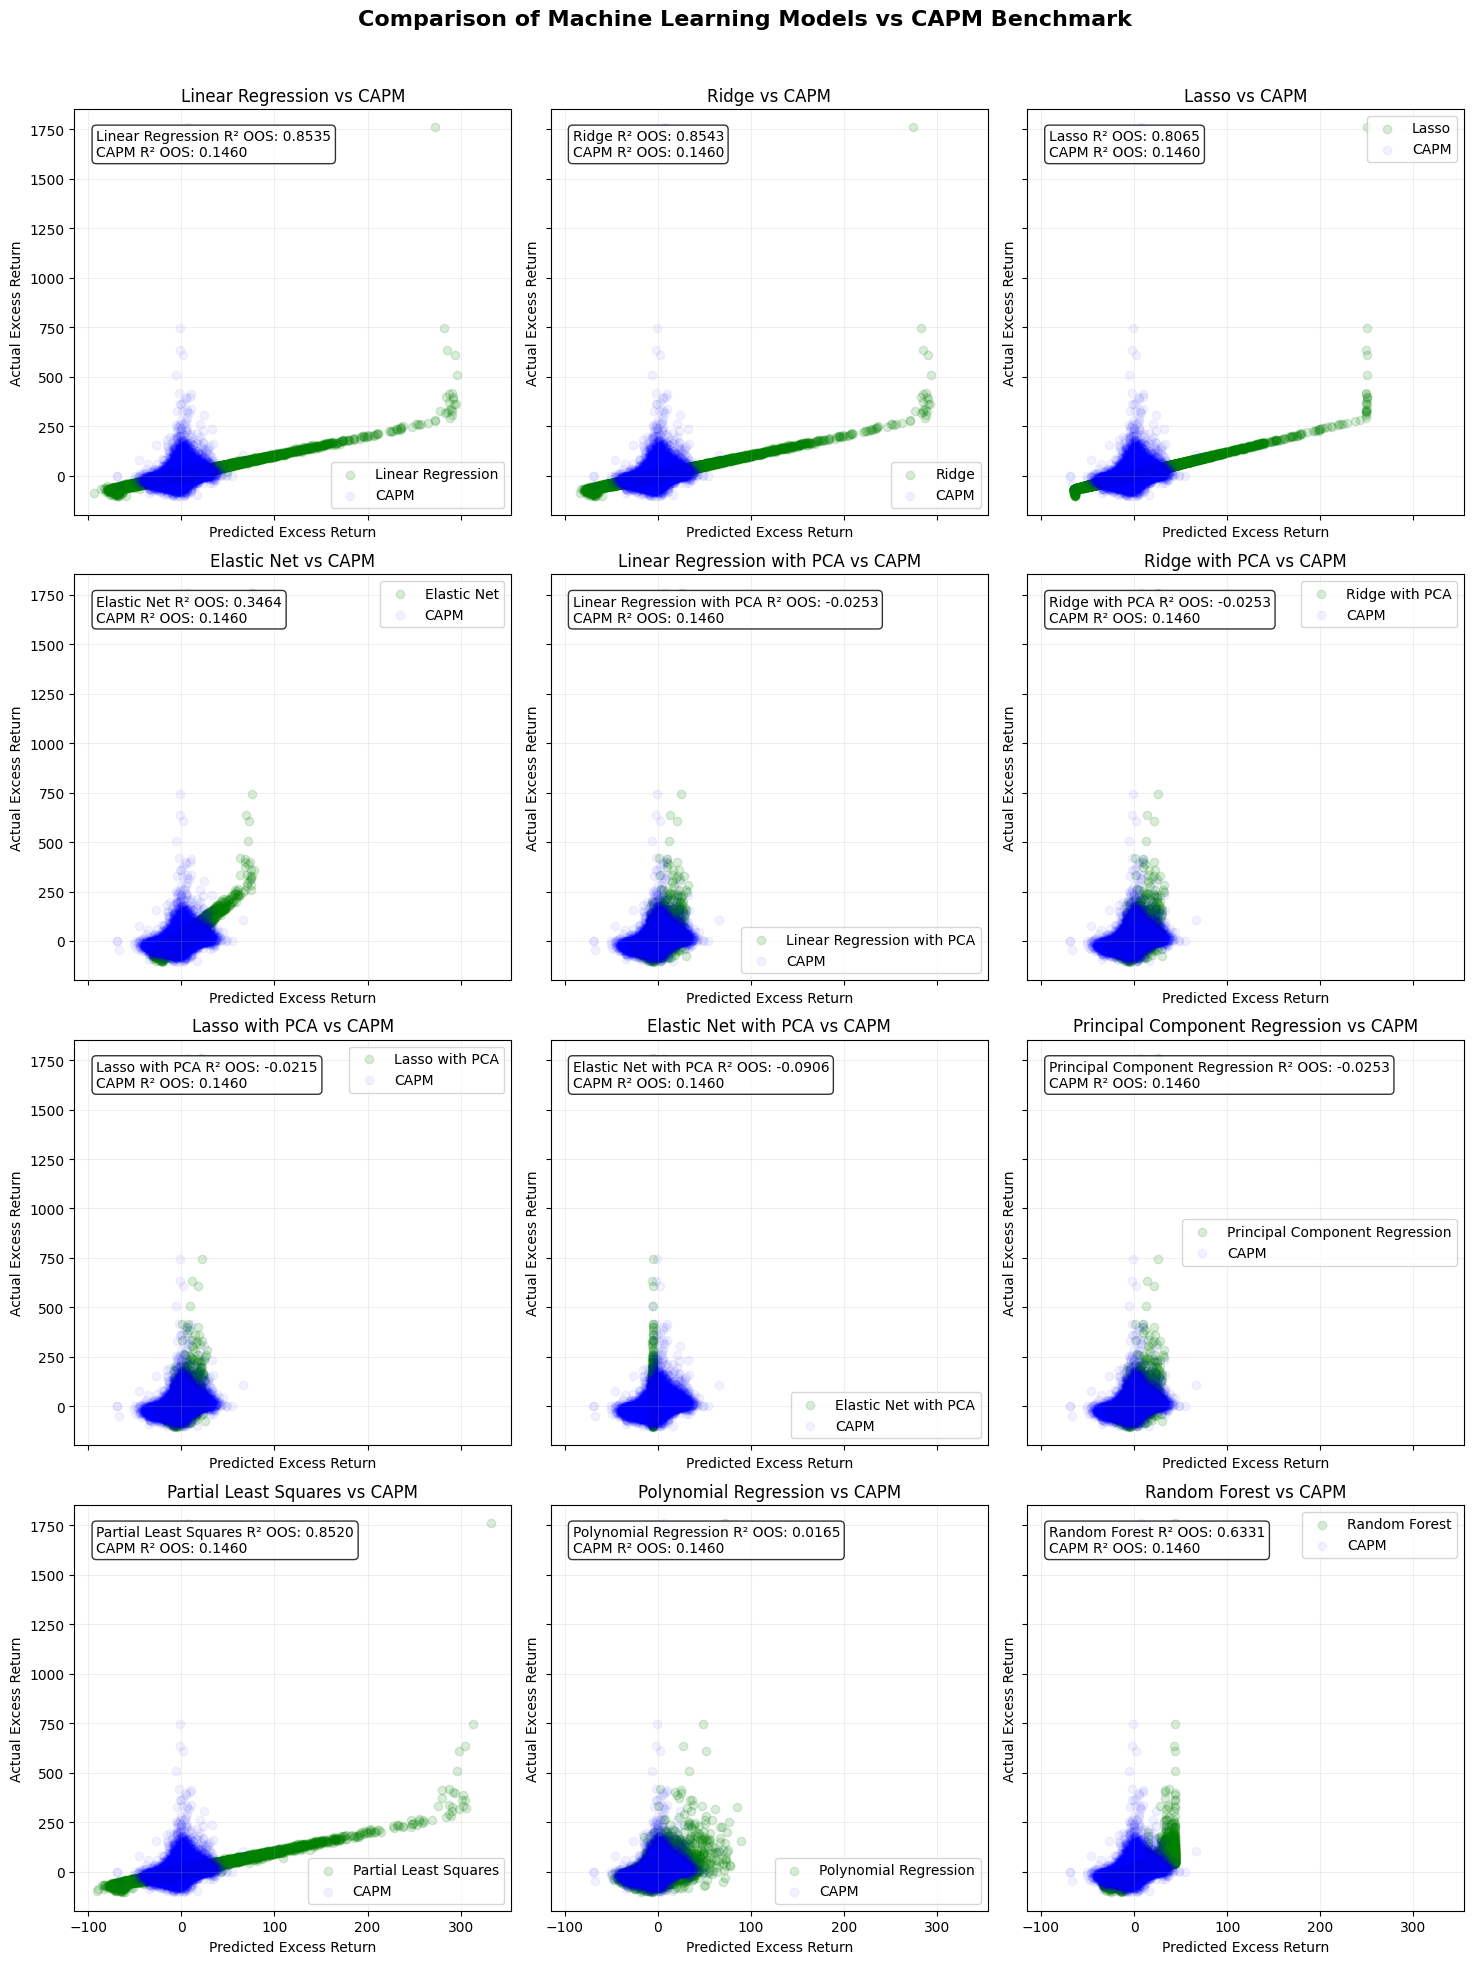

In [ ]:
plot_model_comparison(tuned_model_results, merged_df_capm, test_indices, y_test)

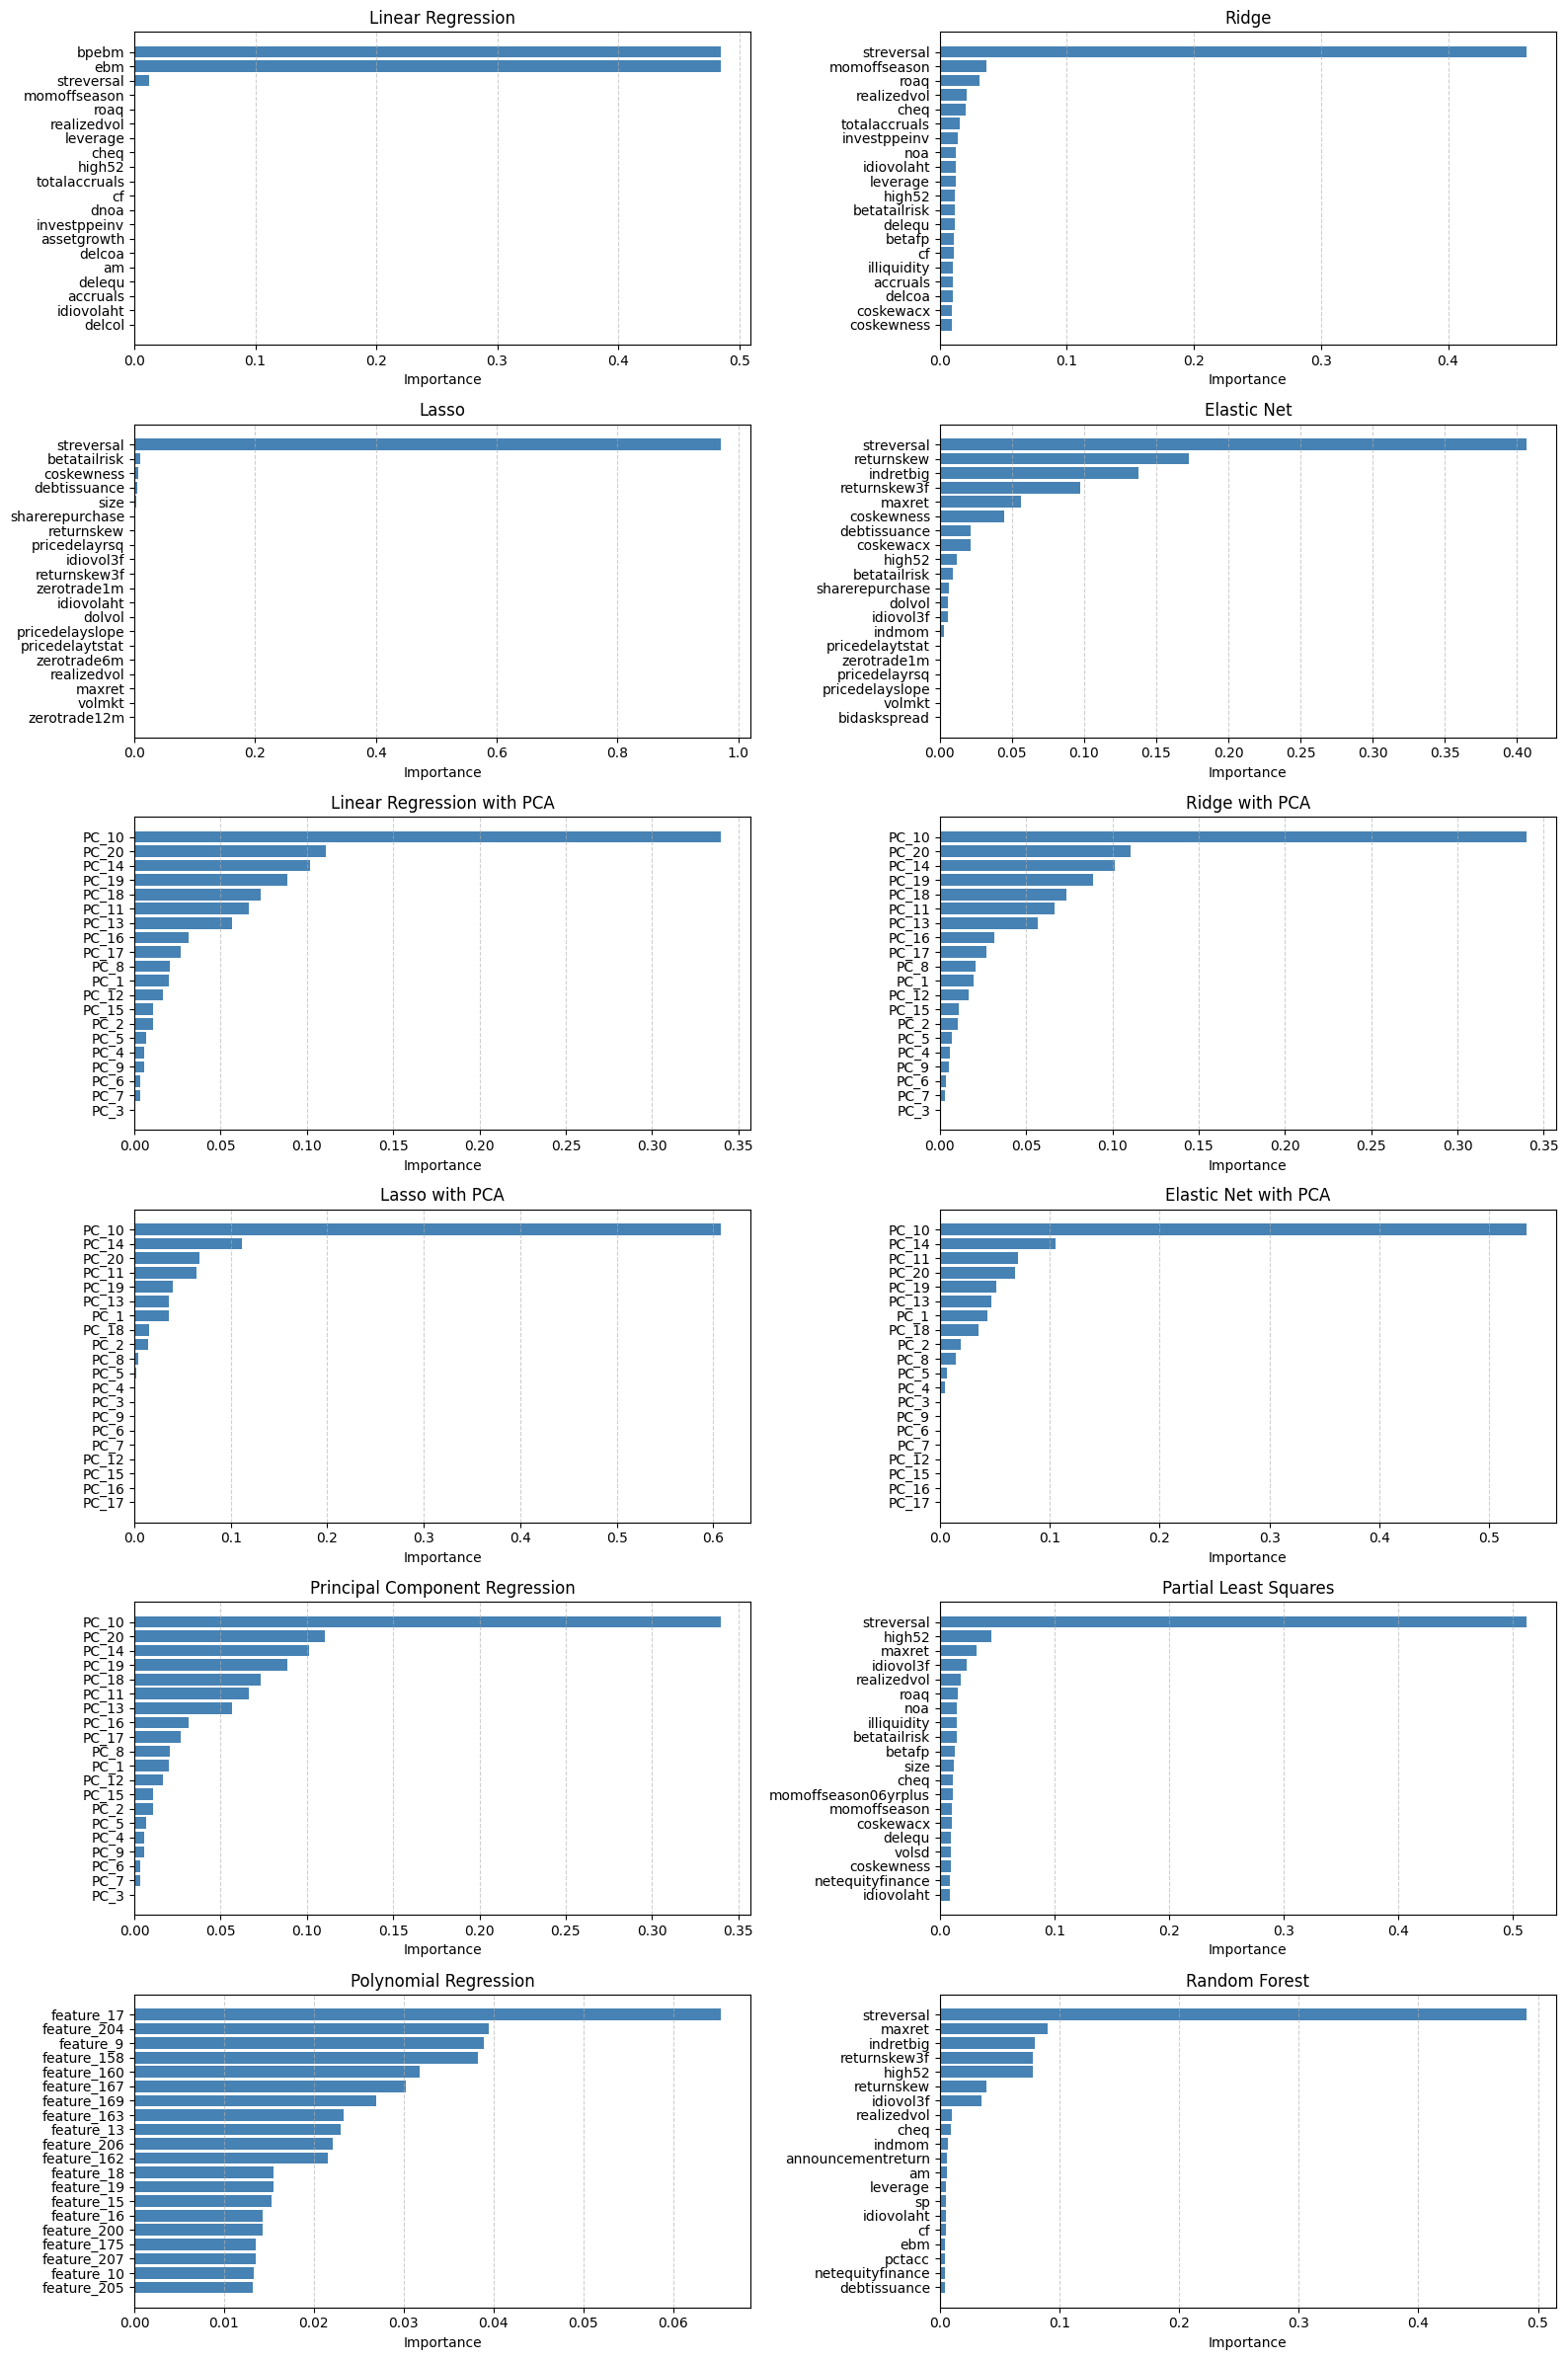

In [ ]:
fig_t2 = plot_feature_importance(
    model_results=tuned_model_results,
    models=models,
    X_train=X_train_scaled[predictor_vars],
    y_train=y_train,
    feature_names=predictor_vars if isinstance(X_train_scaled, pd.DataFrame) else [f'feature_{i}' for i in range(X_train_scaled.shape[1])],
    n_features=20,
    ncols=2,
    figsize=(16, 24)
)

plt.show()

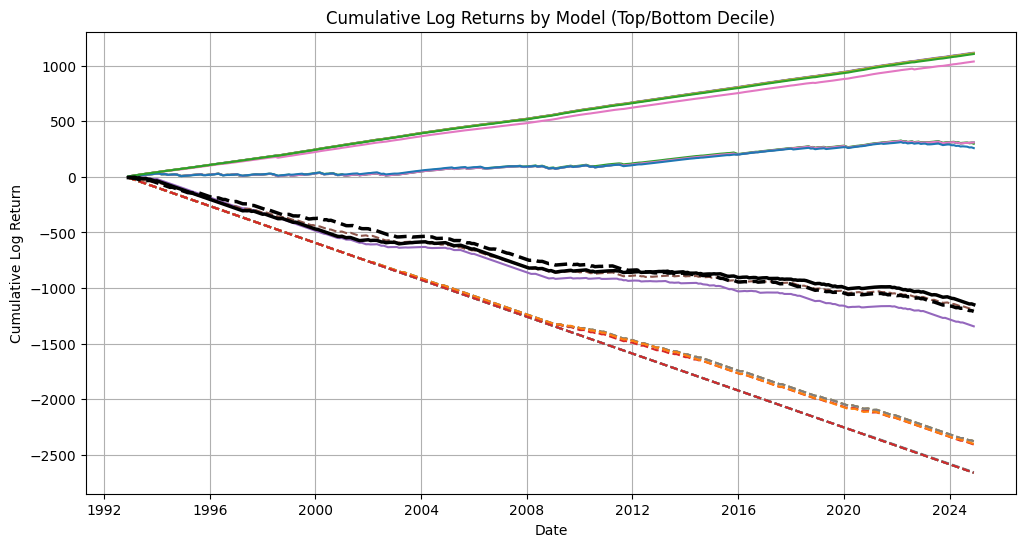

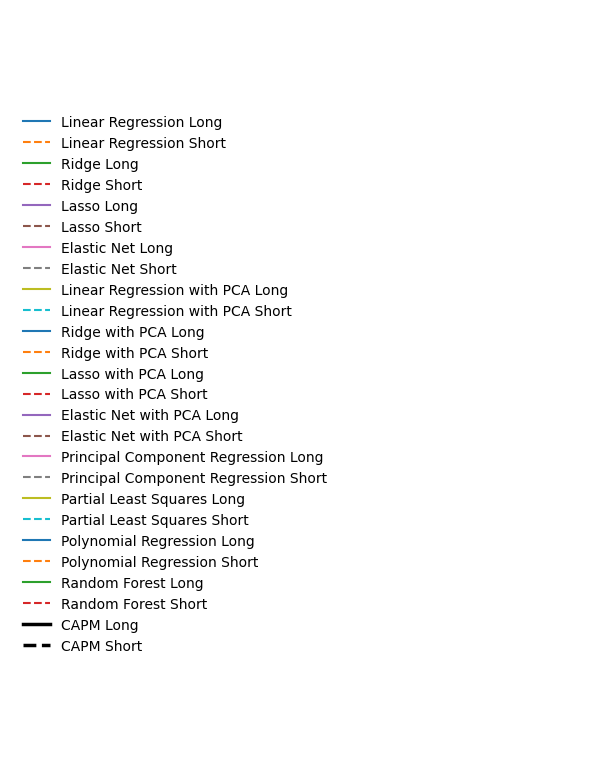

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
handles = []

# Plot ML models
for model_name, results in tuned_model_results.items():
    test_preds = results["test_pred"]
    df_test = merged_df_capm.iloc[test_indices].copy()
    df_test["pred"] = test_preds
    df_test["date"] = pd.to_datetime(df_test["date"])

    df_test["decile"] = df_test.groupby("date")["pred"].transform(
        lambda x: pd.qcut(x, 10, labels=False, duplicates="drop")
    )

    long = df_test[df_test["decile"] == 9]
    short = df_test[df_test["decile"] == 0]

    long_returns = long.groupby("date")["ExcessReturn"].mean()
    short_returns = short.groupby("date")["ExcessReturn"].mean()

    long_returns = long_returns.replace([np.inf, -np.inf], np.nan).dropna().clip(lower=-0.999)
    short_returns = short_returns.replace([np.inf, -np.inf], np.nan).dropna().clip(lower=-0.999)

    long_cumret = np.log1p(long_returns).cumsum()
    short_cumret = np.log1p(short_returns).cumsum()

    long_line, = ax.plot(long_cumret, label=f"{model_name} Long")
    short_line, = ax.plot(short_cumret, linestyle="--", label=f"{model_name} Short")
    handles.extend([long_line, short_line])

# Add CAPM benchmark
capm_df = merged_df_capm.iloc[test_indices].copy()
capm_df["date"] = pd.to_datetime(capm_df["date"])
capm_df["decile"] = capm_df.groupby("date")["CAPM_Predicted_ExcessReturn"].transform(
    lambda x: pd.qcut(x, 10, labels=False, duplicates="drop")
)

capm_long = capm_df[capm_df["decile"] == 9]
capm_short = capm_df[capm_df["decile"] == 0]

capm_long_returns = capm_long.groupby("date")["ExcessReturn"].mean().replace([np.inf, -np.inf], np.nan).dropna().clip(lower=-0.999)
capm_short_returns = capm_short.groupby("date")["ExcessReturn"].mean().replace([np.inf, -np.inf], np.nan).dropna().clip(lower=-0.999)

capm_long_cumret = np.log1p(capm_long_returns).cumsum()
capm_short_cumret = np.log1p(capm_short_returns).cumsum()

# Plot with thicker line
capm_long_line, = ax.plot(capm_long_cumret, label="CAPM Long", linewidth=2.5, color='black')
capm_short_line, = ax.plot(capm_short_cumret, linestyle="--", label="CAPM Short", linewidth=2.5, color='black')

handles.extend([capm_long_line, capm_short_line])

ax.set_title("Cumulative Log Returns by Model (Top/Bottom Decile)")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Log Return")
ax.grid(True)

fig_leg = plt.figure(figsize=(6, len(handles) * 0.3))
plt.legend(handles=handles, loc="center left", frameon=False)
plt.axis("off")
plt.tight_layout()

plt.show()
